# 📊 Credit Risk Model Development
## Statement of Work (SOW)

---

### 🏦 Project Overview

**Client:** Lauki Finance (NBFC, India)  
**Service Provider:** AtliQ AI  
**Data Scientist:** Javidan Akbarov

Lauki Finance is partnering with AtliQ AI to develop a sophisticated credit risk model that will categorize loan applications into credit score bands similar to the CIBIL scoring system.

---

## 🎯 Scope of Work

### 📈 Phase 1: Development and Implementation

#### 1. 🤖 Model Development
- Build a predictive model using Lauki Finance's historical loan data
- Incorporate default indicators and borrower behavior patterns
- Ensure high model explainability for business interpretation

#### 2. 📋 Scorecard Creation
Develop a scoring system that categorizes applicants into:
- 🔴 **Poor** - High risk applications
- 🟡 **Average** - Moderate risk applications
- 🟢 **Good** - Low risk applications
- ⭐ **Excellent** - Premium quality applications

#### 3. 💻 Streamlit UI Application
Create a user-friendly interface for loan officers to:
- Input borrower demographics
- Enter loan details
- Provide bureau information (credit utilization, open accounts)
- Obtain real-time predictions on default probabilities and credit ratings

---

### 🔧 Phase 2: Monitoring and ML Ops

#### 1. 📊 Performance Monitoring
- Implement continuous model performance evaluation
- Track key metrics and model drift
- Generate automated performance reports

#### 2. ⚙️ Operational Integration
- 2-month production trial period
- Establish Straight Through Processing (STP) for high-confidence applications
- Minimize manual review requirements

---

## 📦 Deliverables

✅ Fully functional credit risk model with high explainability  
✅ Streamlit-based application for real-time loan assessment  
✅ Comprehensive documentation and performance reports  
✅ Model maintenance guidelines

---

## 📅 Project Timeline

| Phase | Duration | Details |
|-------|----------|---------|
| **Phase 1** | 2 months | Model development and deployment |
| **Phase 2** | TBD | Based on Phase 1 outcomes |

---

## 💰 Cost and Budgeting

**Phase 1 Costs:**
- Monthly Rate: $18,000
- Total Budget: $36,000 (not to exceed)
- Resource Allocation: 2 full-time resources @ $50/hour

---

## 👥 Stakeholders

### AtliQ AI Team
- 👨‍💻 **Javidan Akbarov** - Data Scientist
- 👨‍💼 **Tony Sharma** - Data Science Team Lead
- 📋 **Nick Puri** - Product Owner

### Lauki Finance Team
- 💼 **Steve Singh** - Project Sponsor
- 🤝 **Wanda Mishra** - Client Point of Contact

---

## 📜 Terms and Conditions

⚠️ This SOW is valid until completion of Phase 1 and Phase 2  
⚠️ Subject to review and renewal for subsequent phases  
⚠️ Scope changes may require cost and timeline amendments

---

## ✍️ Acceptance

*The undersigned representatives of AtliQ AI and Lauki Finance agree to the terms and deliverables outlined in this Statement of Work.*

**AtliQ AI:**  
Signature: ________________  
Name: Javidan Akbarov  
Date: ________________

**Lauki Finance:**  
Signature: ________________  
Name: Steve Singh  
Date: ________________

---

<div style="text-align: center; color: #666; font-size: 0.9em; margin-top: 30px;">
    <i>Project document from Codebasics ML course. All rights reserved: Codebasics.io</i>
</div>

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

pd.set_option('display.float_format', lambda x: '{:.2f}'.format(x))
np.set_printoptions(suppress=True)

In [2]:
df_customers = pd.read_csv('../data/customers.csv')
df_loans = pd.read_csv('../data/loans.csv')
df_bureau = pd.read_csv('../data/bureau_data.csv')

In [3]:
df_customers.shape, df_loans.shape, df_bureau.shape

((50000, 12), (50000, 15), (50000, 8))

In [4]:
df_customers.head()

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,state,zipcode
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,Delhi,110001
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,Tamil Nadu,600001
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,West Bengal,700001
3,C00004,55,F,Single,Self-Employed,3547000,1,Owned,15,Bangalore,Karnataka,560001
4,C00005,37,M,Married,Salaried,3432000,3,Owned,28,Pune,Maharashtra,411001


In [5]:
df_loans.head()

,loan_id,cust_id,loan_purpose,loan_type,sanction_amount,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
0,L00001,C00001,Auto,Secured,3004000,2467000,49340.00,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,False
1,L00002,C00002,Home,Secured,4161000,3883000,77660.00,698940,3106400,30,709309,464100,2019-07-24,2019-08-15,False
2,L00003,C00003,Personal,Unsecured,2401000,2170000,43400.00,390600,1736000,21,1562399,1476042,2019-07-24,2019-08-21,False
3,L00004,C00004,Personal,Unsecured,2345000,1747000,34940.00,314460,1397600,6,1257839,1031094,2019-07-24,2019-08-09,False
4,L00005,C00005,Auto,Secured,4647000,4520000,90400.00,813600,3616000,28,1772334,1032458,2019-07-24,2019-08-02,False


In [6]:
df_bureau.head()

,cust_id,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
0,C00001,1,1,42,0,0,3,7
1,C00002,3,1,96,12,60,5,4
2,C00003,2,1,82,24,147,6,58
3,C00004,3,0,115,15,87,5,26
4,C00005,4,2,120,0,0,5,10


In [7]:
# Let's merge these data frames to have one complete dataframe
df = pd.merge(df_customers, df_loans, on='cust_id')
df

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,...,2467000,49340.00,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,False
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,...,3883000,77660.00,698940,3106400,30,709309,464100,2019-07-24,2019-08-15,False
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,...,2170000,43400.00,390600,1736000,21,1562399,1476042,2019-07-24,2019-08-21,False
3,C00004,55,F,Single,Self-Employed,3547000,1,Owned,15,Bangalore,...,1747000,34940.00,314460,1397600,6,1257839,1031094,2019-07-24,2019-08-09,False
4,C00005,37,M,Married,Salaried,3432000,3,Owned,28,Pune,...,4520000,90400.00,813600,3616000,28,1772334,1032458,2019-07-24,2019-08-02,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,C49996,40,F,Single,Salaried,775000,2,Owned,11,Chennai,...,535000,10700.00,96300,428000,22,385199,178470,2024-07-22,2024-08-15,False
49996,C49997,39,M,Single,Salaried,3117000,0,Owned,9,Kolkata,...,3243000,64860.00,583740,2594400,15,1656484,1040735,2024-07-22,2024-07-29,False
49997,C49998,45,F,Single,Self-Employed,1329000,0,Rented,27,Bangalore,...,3740000,74800.00,673200,2992000,37,912691,355461,2024-07-22,2024-07-25,False
49998,C49999,42,F,Single,Self-Employed,533000,2,Mortgage,20,Hyderabad,...,1630000,32600.00,293400,1304000,37,300035,179453,2024-07-22,2024-07-29,False


In [8]:
df = pd.merge(df, df_bureau)
df

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,default,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,...,2019-07-24,2019-08-10,False,1,1,42,0,0,3,7
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,...,2019-07-24,2019-08-15,False,3,1,96,12,60,5,4
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,...,2019-07-24,2019-08-21,False,2,1,82,24,147,6,58
3,C00004,55,F,Single,Self-Employed,3547000,1,Owned,15,Bangalore,...,2019-07-24,2019-08-09,False,3,0,115,15,87,5,26
4,C00005,37,M,Married,Salaried,3432000,3,Owned,28,Pune,...,2019-07-24,2019-08-02,False,4,2,120,0,0,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,C49996,40,F,Single,Salaried,775000,2,Owned,11,Chennai,...,2024-07-22,2024-08-15,False,4,2,165,1,6,8,24
49996,C49997,39,M,Single,Salaried,3117000,0,Owned,9,Kolkata,...,2024-07-22,2024-07-29,False,4,0,161,0,0,4,91
49997,C49998,45,F,Single,Self-Employed,1329000,0,Rented,27,Bangalore,...,2024-07-22,2024-07-25,False,4,1,42,0,0,7,38
49998,C49999,42,F,Single,Self-Employed,533000,2,Mortgage,20,Hyderabad,...,2024-07-22,2024-07-29,False,1,2,42,9,47,4,17


In [9]:
df.shape

(50000, 33)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   cust_id                      50000 non-null  object 
 1   age                          50000 non-null  int64  
 2   gender                       50000 non-null  object 
 3   marital_status               50000 non-null  object 
 4   employment_status            50000 non-null  object 
 5   income                       50000 non-null  int64  
 6   number_of_dependants         50000 non-null  int64  
 7   residence_type               49938 non-null  object 
 8   years_at_current_address     50000 non-null  int64  
 9   city                         50000 non-null  object 
 10  state                        50000 non-null  object 
 11  zipcode                      50000 non-null  int64  
 12  loan_id                      50000 non-null  object 
 13  loan_purpose    

In [11]:
df['default'].value_counts()

default
False    45703
True      4297
Name: count, dtype: int64

In [12]:
df['default'] = df['default'].astype(int)

In [13]:
df['default'].value_counts()

default
0    45703
1     4297
Name: count, dtype: int64

In [14]:
df.sample(3)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,default,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
47178,C47179,46,M,Married,Self-Employed,2350000,3,Mortgage,27,Delhi,...,2024-04-10,2024-05-03,0,1,1,31,18,101,4,23
19753,C19754,51,M,Married,Self-Employed,4619000,2,Owned,9,Ahmedabad,...,2021-07-14,2021-08-09,0,1,1,47,6,37,5,37
32772,C32773,21,F,Single,Self-Employed,2272000,1,Owned,11,Kolkata,...,2022-11-01,2022-11-29,0,2,2,90,1,7,7,60


In [15]:
df['default'].value_counts()[0]/df.shape[0]*100

np.float64(91.40599999999999)

In [16]:
X = df.drop('default', axis = 'columns')
y = df['default']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y ,test_size = 0.25, random_state = 42)

df_train = pd.concat([X_train, y_train], axis = 'columns')
df_test = pd.concat([X_test, y_test], axis = 'columns')

df_train.shape, df_test.shape

((37500, 33), (12500, 33))

In [17]:
df_train.head()

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default
12746,C12747,59,M,Married,Self-Employed,11327000,3,Owned,30,Hyderabad,...,2020-10-31,2020-11-11,4,2,152,20,118,4,36,0
32495,C32496,44,F,Single,Salaried,715000,0,Owned,27,Mumbai,...,2022-10-22,2022-10-27,3,1,160,10,62,5,5,0
43675,C43676,38,M,Single,Salaried,3195000,0,Mortgage,26,Chennai,...,2023-12-04,2023-12-29,1,1,54,12,67,4,0,0
9040,C09041,42,M,Married,Salaried,1500000,2,Mortgage,30,Bangalore,...,2020-06-18,2020-07-07,3,0,76,0,0,8,87,0
13077,C13078,58,M,Married,Self-Employed,1817000,4,Owned,29,Pune,...,2020-11-12,2020-12-07,1,2,60,0,0,1,71,0


In [18]:
df_test.head()

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default
19205,C19206,36,M,Married,Self-Employed,3728000,3,Owned,24,Jaipur,...,2021-06-24,2021-07-23,2,1,42,0,0,5,98,0
15514,C15515,43,F,Single,Self-Employed,2493000,0,Owned,23,Delhi,...,2021-02-09,2021-02-18,4,0,125,0,0,5,32,0
30367,C30368,30,M,Married,Self-Employed,3114000,4,Owned,27,Delhi,...,2022-08-06,2022-08-21,3,0,76,0,0,6,82,0
35347,C35348,37,F,Single,Salaried,570000,2,Owned,5,Pune,...,2023-02-03,2023-02-04,4,2,125,3,21,7,48,0
41814,C41815,48,F,Single,Salaried,662000,0,Mortgage,23,Chennai,...,2023-09-27,2023-10-17,3,1,131,14,89,8,97,1


In [19]:
df_test.describe()

,age,income,number_of_dependants,years_at_current_address,zipcode,sanction_amount,loan_amount,processing_fee,gst,net_disbursement,...,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default
count,12500.00,12500.00,12500.00,12500.00,12500.00,12500.00,12500.00,12500.00,12500.00,12500.00,...,12500.00,12500.00,12500.00,12500.00,12500.00,12500.00,12500.00,12500.00,12500.00,12500.00
mean,39.58,2663611.52,1.92,16.08,419764.68,4720235.36,4010512.00,81106.80,721892.16,3208409.60,...,1349085.60,997608.93,2.49,1.00,76.18,4.98,27.41,5.01,43.17,0.09
std,9.82,2646325.46,1.53,8.94,168830.50,6295747.58,5390797.52,129056.17,970343.55,4312638.02,...,1217803.78,1054800.26,1.12,0.81,43.75,5.88,32.99,2.03,29.25,0.28
min,18.00,0.00,0.00,1.00,110001.00,0.00,0.00,0.00,0.00,0.00,...,-1.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00
25%,33.00,808000.00,0.00,8.00,302001.00,1163750.00,981750.00,19635.00,176715.00,785400.00,...,430945.75,286811.25,1.00,0.00,43.00,0.00,0.00,4.00,18.00,0.00
50%,40.00,1914000.00,2.00,16.00,411001.00,2687000.00,2265000.00,45300.00,407700.00,1812000.00,...,1019555.00,677141.00,2.00,1.00,71.00,3.00,15.00,5.00,39.00,0.00
75%,46.00,3352000.00,3.00,24.00,560001.00,5148500.00,4590500.00,91840.00,826290.00,3672400.00,...,1808608.25,1255572.25,3.00,2.00,107.00,9.00,47.00,6.00,67.00,0.00
max,70.00,11986000.00,5.00,31.00,700001.00,51198000.00,46086000.00,5698029.90,8295480.00,36868800.00,...,5000000.00,7370387.00,4.00,2.00,221.00,24.00,161.00,9.00,99.00,1.00


In [20]:
df_train.describe()

,age,income,number_of_dependants,years_at_current_address,zipcode,sanction_amount,loan_amount,processing_fee,gst,net_disbursement,...,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default
count,37500.00,37500.00,37500.00,37500.00,37500.00,37500.00,37500.00,37500.00,37500.00,37500.00,...,37500.00,37500.00,37500.00,37500.00,37500.00,37500.00,37500.00,37500.00,37500.00,37500.00
mean,39.54,2633326.16,1.94,16.00,418866.25,4699691.57,3996067.73,80290.68,719292.19,3196854.19,...,1333819.51,986298.87,2.50,1.00,76.11,4.84,26.67,5.01,43.42,0.09
std,9.86,2623780.52,1.54,8.92,169035.02,6257832.98,5371862.29,113128.14,966935.21,4297489.83,...,1213674.44,1043145.01,1.12,0.81,43.77,5.84,32.78,2.03,29.39,0.28
min,18.00,0.00,0.00,1.00,110001.00,0.00,0.00,0.00,0.00,0.00,...,-1.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00
25%,33.00,802000.00,0.00,8.00,302001.00,1142000.00,961000.00,19220.00,172980.00,768800.00,...,422197.50,287040.25,1.00,0.00,42.00,0.00,0.00,4.00,18.00,0.00
50%,39.00,1885000.00,2.00,16.00,400001.00,2644000.00,2230000.00,44600.00,401400.00,1784000.00,...,997427.50,665014.50,3.00,1.00,71.00,3.00,13.00,5.00,39.00,0.00
75%,46.00,3326250.00,3.00,24.00,560001.00,5178000.00,4619000.00,92420.00,831420.00,3695200.00,...,1784879.00,1234062.75,4.00,2.00,107.00,8.00,46.00,6.00,67.00,0.00
max,70.00,11999000.00,5.00,31.00,700001.00,52175000.00,47819000.00,5293543.52,8607420.00,38255200.00,...,5000000.00,7846643.00,4.00,2.00,223.00,24.00,171.00,9.00,99.00,1.00


In [21]:
df_train.isna().sum()

cust_id                         0
age                             0
gender                          0
marital_status                  0
employment_status               0
income                          0
number_of_dependants            0
residence_type                 47
years_at_current_address        0
city                            0
state                           0
zipcode                         0
loan_id                         0
loan_purpose                    0
loan_type                       0
sanction_amount                 0
loan_amount                     0
processing_fee                  0
gst                             0
net_disbursement                0
loan_tenure_months              0
principal_outstanding           0
bank_balance_at_application     0
disbursal_date                  0
installment_start_dt            0
number_of_open_accounts         0
number_of_closed_accounts       0
total_loan_months               0
delinquent_months               0
total_dpd     

In [22]:
df_train.residence_type.unique()

array(['Owned', 'Mortgage', 'Rented', nan], dtype=object)

In [23]:
df_train.residence_type.value_counts()

residence_type
Owned       21133
Mortgage     8858
Rented       7462
Name: count, dtype: int64

In [24]:
df_train['residence_type'] = df_train['residence_type'].fillna(df_train.residence_type.mode()[0])

In [25]:
df_train.residence_type.unique()

array(['Owned', 'Mortgage', 'Rented'], dtype=object)

In [26]:
df_train.residence_type.value_counts()

residence_type
Owned       21180
Mortgage     8858
Rented       7462
Name: count, dtype: int64

In [27]:
df_test['residence_type'] = df_test['residence_type'].fillna(df_test.residence_type.mode()[0])

In [28]:
df_test.residence_type.unique()

array(['Owned', 'Mortgage', 'Rented'], dtype=object)

In [29]:
df_train.duplicated().sum()

np.int64(0)

In [30]:
continuous_cols = [col for col in df.select_dtypes(include=['int64', 'float64']) if  col not in ['cust_id', 'loan_id', 'default', 'zipcode']]
cateogorical_cols = [col for col in df.select_dtypes(include=['object', 'bool']) if col not in ['cust_id', 'loan_id','disbursal_date','installment_start_dt']]
cateogorical_cols.append('zipcode')
cateogorical_cols.append('default')

In [31]:
continuous_cols

['age',
 'income',
 'number_of_dependants',
 'years_at_current_address',
 'sanction_amount',
 'loan_amount',
 'processing_fee',
 'gst',
 'net_disbursement',
 'loan_tenure_months',
 'principal_outstanding',
 'bank_balance_at_application',
 'number_of_open_accounts',
 'number_of_closed_accounts',
 'total_loan_months',
 'delinquent_months',
 'total_dpd',
 'enquiry_count',
 'credit_utilization_ratio']

In [32]:
cateogorical_cols

['gender',
 'marital_status',
 'employment_status',
 'residence_type',
 'city',
 'state',
 'loan_purpose',
 'loan_type',
 'zipcode',
 'default']

In [33]:
# for col in continuous_cols:
#     sns.boxplot(df_train[col])

In [34]:
len(continuous_cols)

19

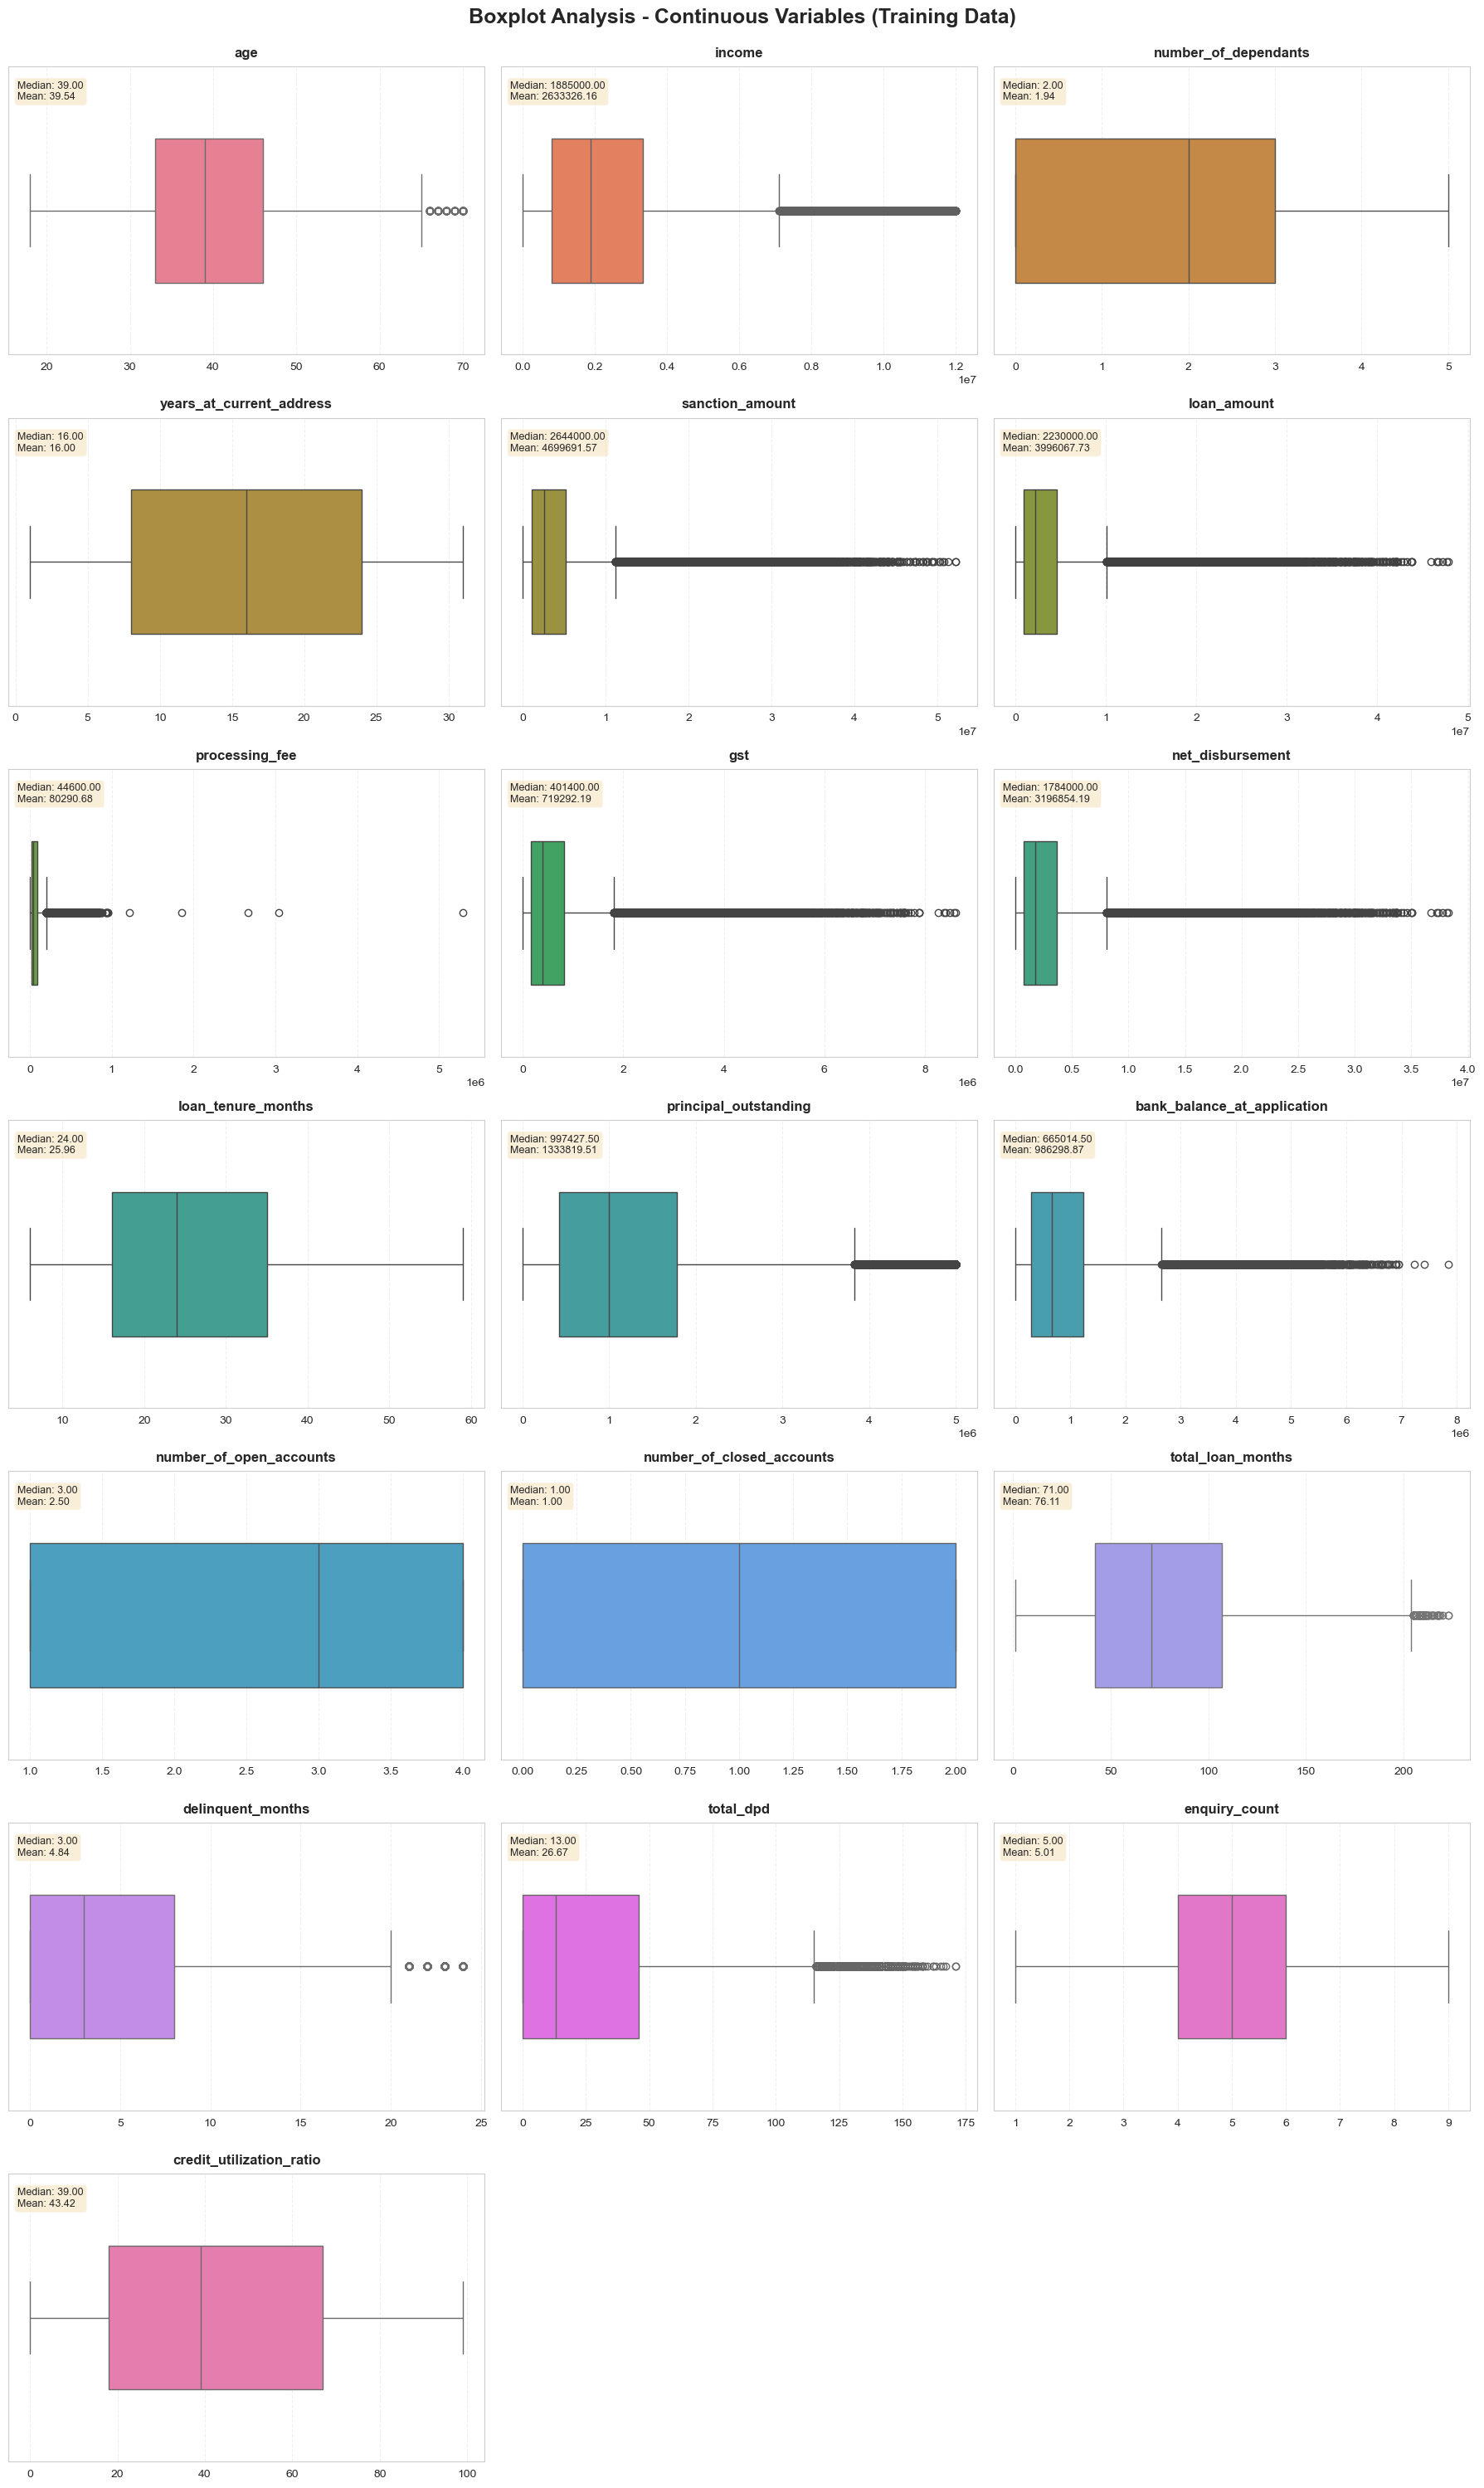

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")

# Create figure: 7 rows x 3 columns
fig, axes = plt.subplots(7, 3, figsize=(18, 30))
axes = axes.flatten()

# Color palette
colors = sns.color_palette("husl", len(continuous_cols))

# Plot each column (horizontal boxplots)
for idx, col in enumerate(continuous_cols):
    sns.boxplot(data=df_train, x=col, ax=axes[idx], 
                color=colors[idx], width=0.5)
    
    # Formatting
    axes[idx].set_title(f'{col}', fontsize=12, fontweight='bold', pad=8)
    axes[idx].set_xlabel('')
    axes[idx].tick_params(labelsize=10)
    axes[idx].grid(axis='x', alpha=0.3, linestyle='--')
    
    # Calculate stats
    median_val = df_train[col].median()
    mean_val = df_train[col].mean()
    
    # Add stats as text
    stats_text = f'Median: {median_val:.2f}\nMean: {mean_val:.2f}'
    axes[idx].text(0.02, 0.95, stats_text, 
                   transform=axes[idx].transAxes,
                   fontsize=9, verticalalignment='top',
                   horizontalalignment='left',
                   bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Hide empty subplots (positions 19 and 20)
for idx in range(19, 21):
    axes[idx].axis('off')

# Main title
plt.suptitle('Boxplot Analysis - Continuous Variables (Training Data)', 
             fontsize=18, fontweight='bold', y=0.998)

plt.tight_layout()
plt.show()

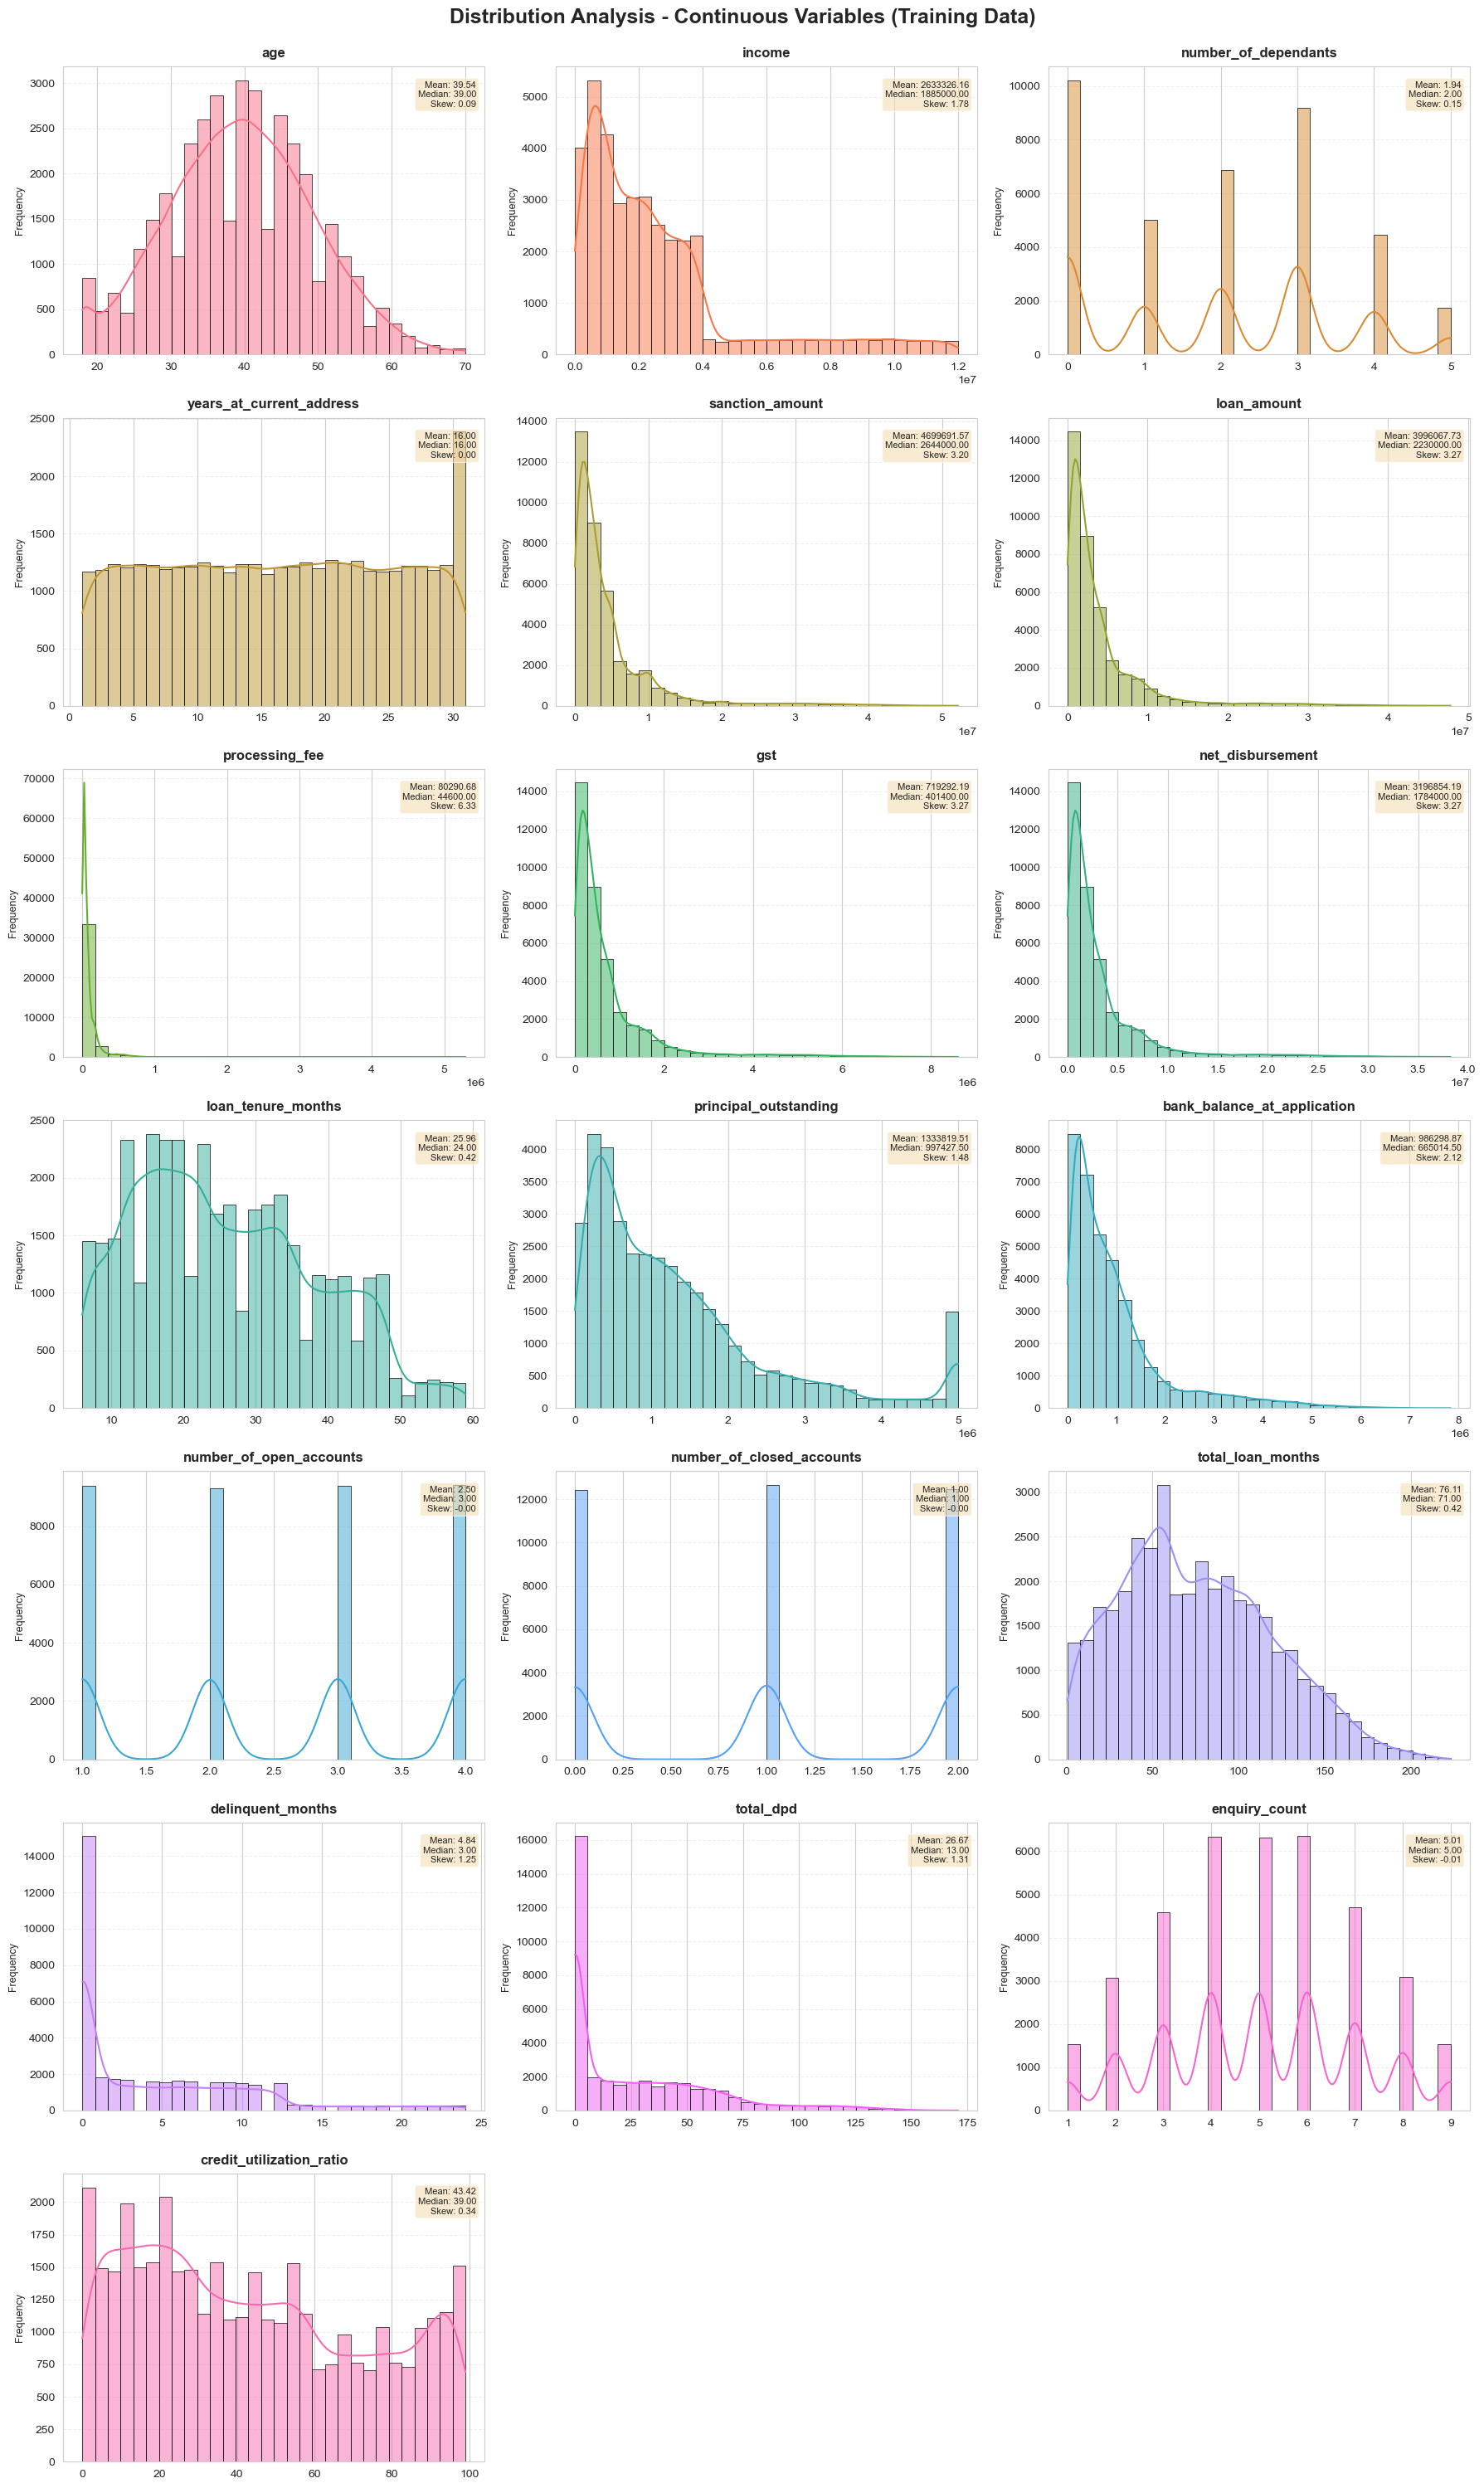

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")

# Create figure: 7 rows x 3 columns
fig, axes = plt.subplots(7, 3, figsize=(18, 30))
axes = axes.flatten()

# Color palette
colors = sns.color_palette("husl", len(continuous_cols))

# Plot each column (histograms with KDE)
for idx, col in enumerate(continuous_cols):
    sns.histplot(data=df_train, x=col, ax=axes[idx], 
                color=colors[idx], bins=30, kde=True, 
                edgecolor='black', linewidth=0.5)
    
    # Formatting
    axes[idx].set_title(f'{col}', fontsize=12, fontweight='bold', pad=8)
    axes[idx].set_xlabel('')
    axes[idx].set_ylabel('Frequency', fontsize=9)
    axes[idx].tick_params(labelsize=10)
    axes[idx].grid(axis='y', alpha=0.3, linestyle='--')
    
    # Calculate stats
    median_val = df_train[col].median()
    mean_val = df_train[col].mean()
    skew_val = df_train[col].skew()
    
    # Add stats as text
    stats_text = f'Mean: {mean_val:.2f}\nMedian: {median_val:.2f}\nSkew: {skew_val:.2f}'
    axes[idx].text(0.98, 0.95, stats_text, 
                   transform=axes[idx].transAxes,
                   fontsize=8, verticalalignment='top',
                   horizontalalignment='right',
                   bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.6))

# Hide empty subplots (positions 19 and 20)
for idx in range(19, 21):
    axes[idx].axis('off')

# Main title
plt.suptitle('Distribution Analysis - Continuous Variables (Training Data)', 
             fontsize=18, fontweight='bold', y=0.998)

plt.tight_layout()
plt.show()

In [37]:
df_train.processing_fee.describe()

count     37500.00
mean      80290.68
std      113128.14
min           0.00
25%       19220.00
50%       44600.00
75%       92420.00
max     5293543.52
Name: processing_fee, dtype: float64

In [38]:
df_train[df_train.processing_fee > df_train.loan_amount][['loan_amount', 'processing_fee']]

,loan_amount,processing_fee
23981,2234000,2669791.02
28174,966000,1214492.67
47089,1738000,1858964.77
29305,2616000,3036378.01
9898,3626000,5293543.52


In [39]:
# business said any processefing_fee/loan_amount ratio which is greater than 3% is an outlier. So let's make sure of it
df_train[(df_train.processing_fee / df_train.loan_amount) > 0.03][['loan_amount', 'processing_fee']]

,loan_amount,processing_fee
23981,2234000,2669791.02
28174,966000,1214492.67
47089,1738000,1858964.77
29305,2616000,3036378.01
9898,3626000,5293543.52


In [40]:
df_train_1 = df_train[(df_train.processing_fee / df_train.loan_amount) < 0.03].copy()
df_train_1.shape

# df_train_1 = df_train[
#     (df_train['processing_fee'] / df_train['loan_amount'] < 0.03) &
#     (df_train['GST'] / df_train['loan_amount'] < 0.006) &
#     (df_train['net_disbursement_amount'] / df_train['loan_amount'].between(0.90, 1.00)) &
#     (df_train['sanction_amount'] / df_train['loan_amount'].between(0.90, 1.10))
# ].copy()
# df_train_1.shape

(37488, 33)

In [41]:
df_train_1[(df_train_1.processing_fee > df_train_1.loan_amount) > 0.03][['loan_amount', 'processing_fee']]

,loan_amount,processing_fee


In [42]:
df_test = df_test[(df_test.processing_fee / df_test.loan_amount) < 0.03]
df_test.shape

# df_test = df_test[
#     (df_test['processing_fee'] / df_test['loan_amount'] < 0.03) &
#     (df_test['GST'] / df_test['loan_amount'] < 0.006) &
#     (df_test['net_disbursement_amount'] / df_test['loan_amount'].between(0.90, 1.00)) &
#     (df_test['sanction_amount'] / df_test['loan_amount'].between(0.90, 1.10))
# ].copy()
# df_test.shape

(12497, 33)

In [43]:
# Let's now check for categorical_columns
for col in cateogorical_cols:
    print(f'{col} ---> {df_train_1[col].unique()}')

gender ---> ['M' 'F']
marital_status ---> ['Married' 'Single']
employment_status ---> ['Self-Employed' 'Salaried']
residence_type ---> ['Owned' 'Mortgage' 'Rented']
city ---> ['Hyderabad' 'Mumbai' 'Chennai' 'Bangalore' 'Pune' 'Kolkata' 'Ahmedabad'
 'Delhi' 'Lucknow' 'Jaipur']
state ---> ['Telangana' 'Maharashtra' 'Tamil Nadu' 'Karnataka' 'West Bengal'
 'Gujarat' 'Delhi' 'Uttar Pradesh' 'Rajasthan']
loan_purpose ---> ['Home' 'Education' 'Personal' 'Auto' 'Personaal']
loan_type ---> ['Secured' 'Unsecured']
zipcode ---> [500001 400001 600001 560001 411001 700001 380001 110001 226001 302001]
default ---> [0 1]


In [44]:
df_train_1['loan_purpose'] = df_train_1['loan_purpose'].replace('Personaal', 'Personal')
df_test['loan_purpose'] = df_test['loan_purpose'].replace('Personaal', 'Personal')
df_train_1.loan_purpose.unique()

array(['Home', 'Education', 'Personal', 'Auto'], dtype=object)

<Axes: xlabel='processing_fee', ylabel='Count'>

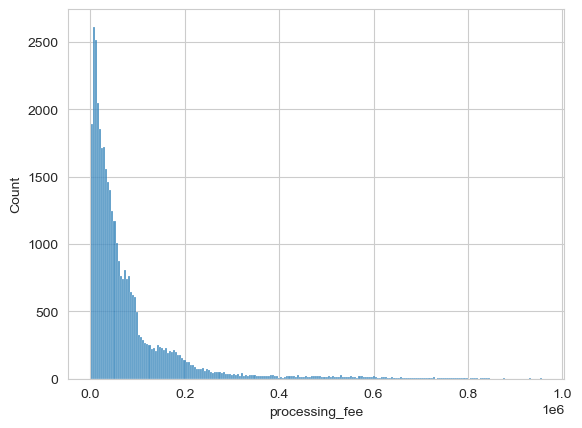

In [45]:
sns.histplot(df_train_1, x=df_train_1['processing_fee'])

In [46]:
# print("Processing Fee %:", (df_train['processing_fee'] / df_train['loan_amount']).describe())
# print("\nGST %:", (df_train['gst'] / df_train['loan_amount']).describe())
# print("\nNet Disbursement %:", (df_train['net_disbursement'] / df_train['loan_amount']).describe())
# print("\nSanction Ratio:", (df_train['sanction_amount'] / df_train['loan_amount']).describe())

# Explorary Data Analysis

<Axes: xlabel='age', ylabel='Count'>

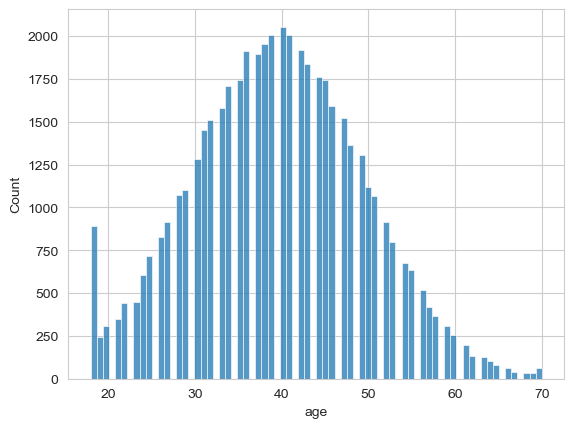

In [47]:
sns.histplot(df['age'])

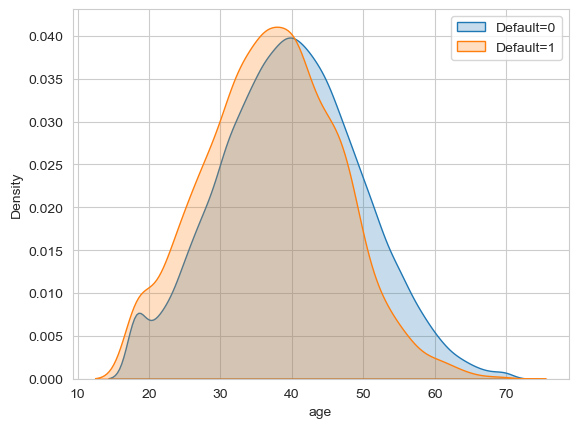

In [48]:
sns.kdeplot(df_train_1[df_train_1.default == 0]['age'], fill=True, label='Default=0')
sns.kdeplot(df_train_1[df_train_1.default == 1]['age'], fill=True, label='Default=1')
plt.legend()
plt.show()

* Insights:
   1. Orange graph represents younger ppl and they are most likely to default.

In [49]:
len(continuous_cols)

19

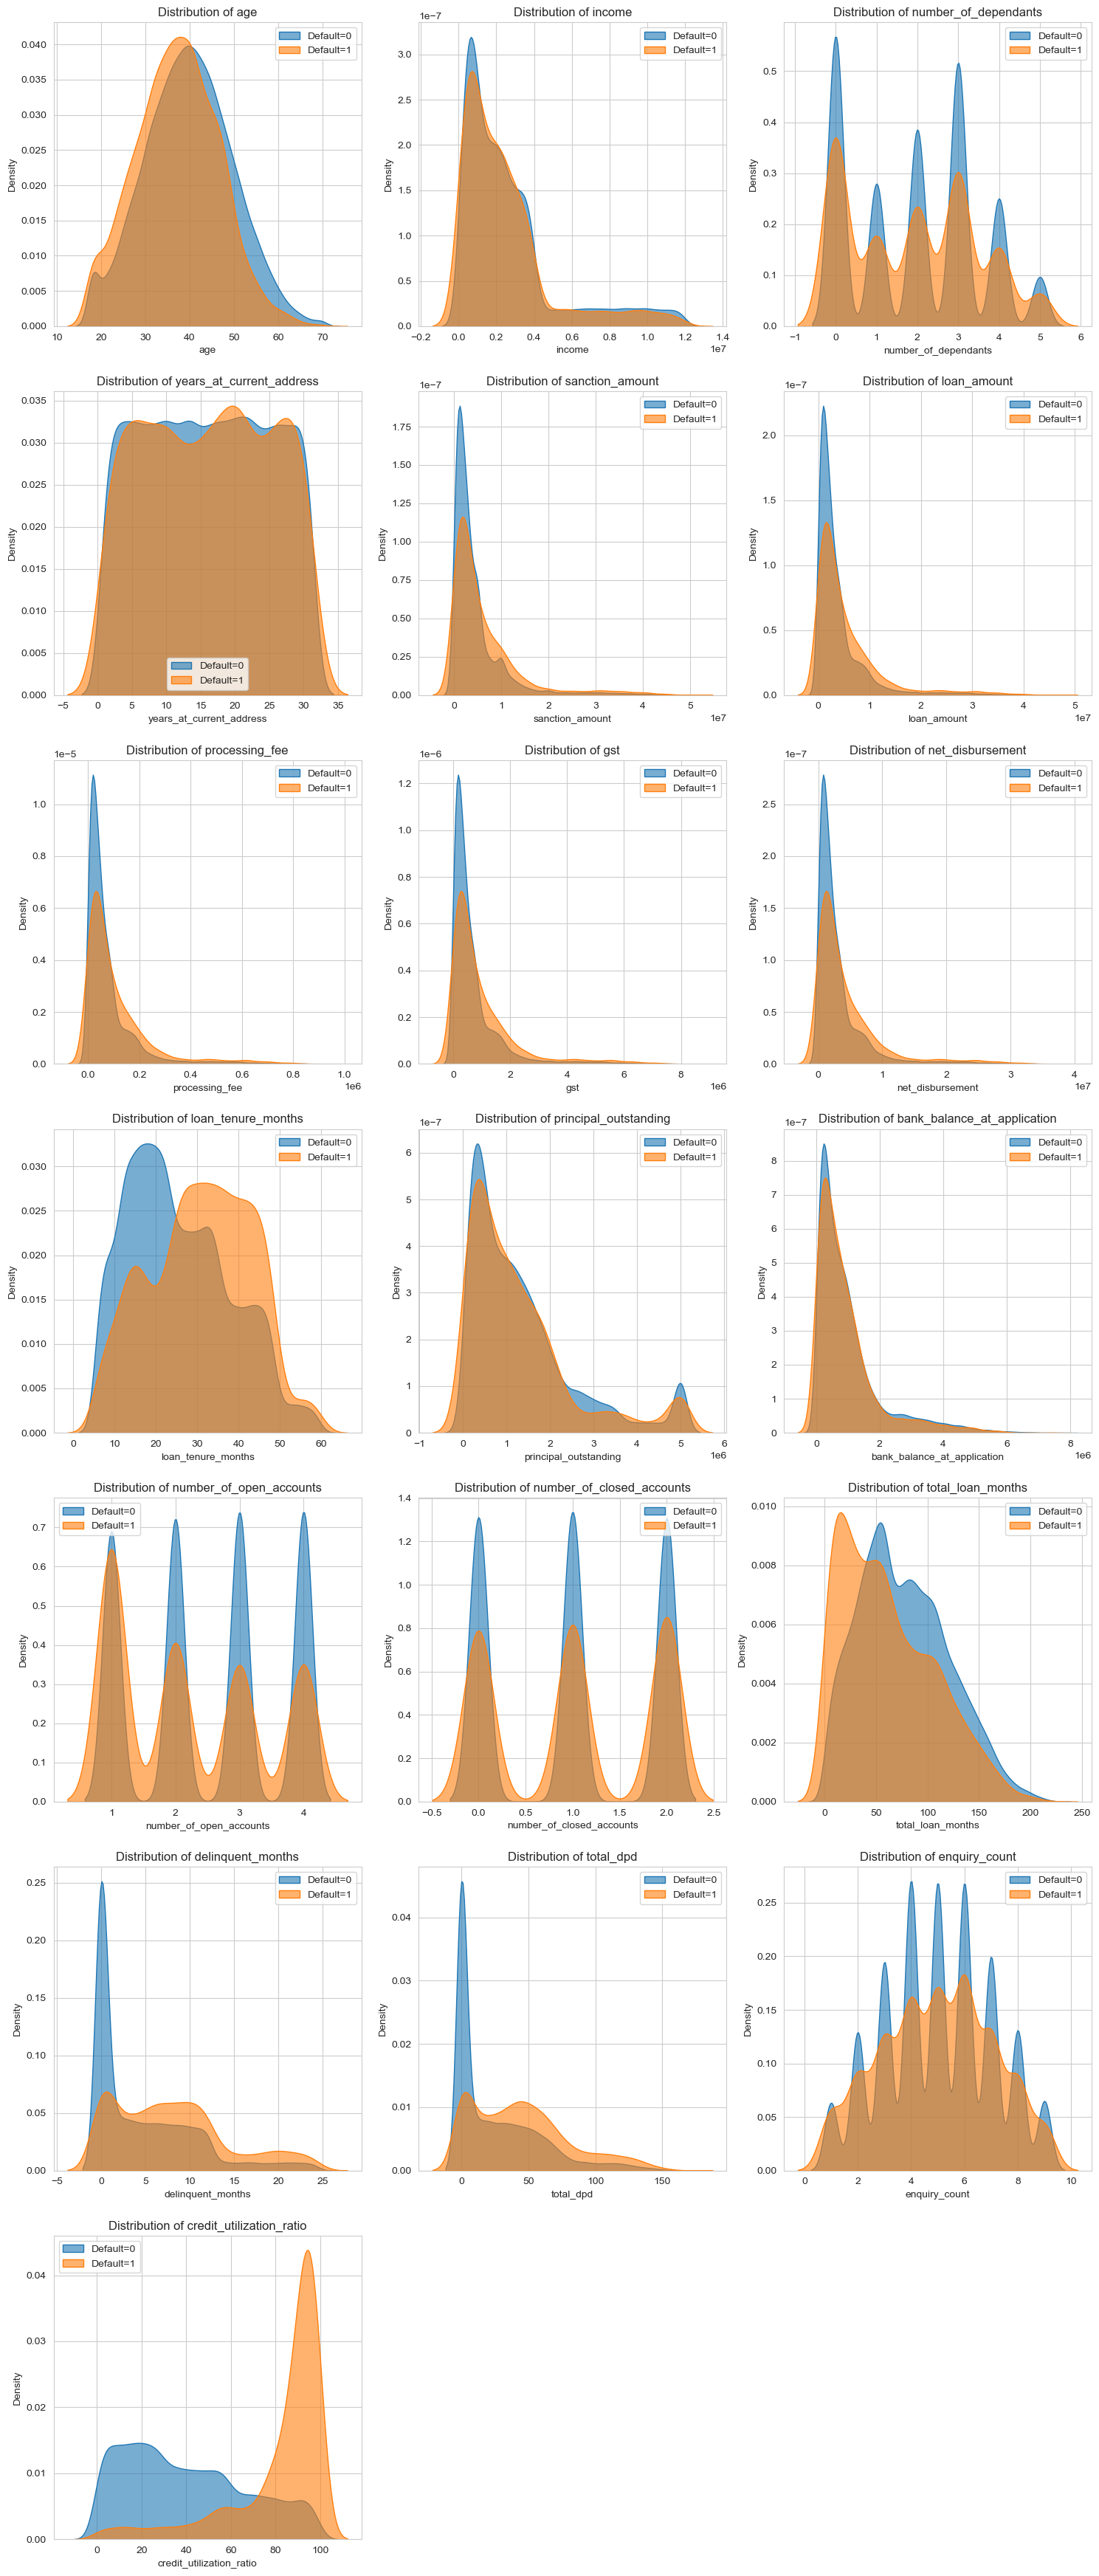

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming continuous_cols is your list of 19 column names
# continuous_cols = ['age', 'income', 'balance', ...]

# Calculate grid dimensions
n_cols = len(continuous_cols)
n_rows = (n_cols + 2) // 3  # 3 plots per row, round up
fig, axes = plt.subplots(n_rows, 3, figsize=(15, 5 * n_rows))
axes = axes.flatten()  # Flatten to 1D array for easy indexing

for i, col in enumerate(continuous_cols):
    ax = axes[i]
    
    # Plot KDE for default=0 and default=1
    sns.kdeplot(df_train_1[df_train_1.default == 0][col], 
                fill=True, label='Default=0', ax=ax, alpha=0.6)
    sns.kdeplot(df_train_1[df_train_1.default == 1][col], 
                fill=True, label='Default=1', ax=ax, alpha=0.6)
    
    ax.set_title(f'Distribution of {col}')
    ax.legend()

# Hide extra subplots if any
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

* Insights
   1. Younger people are more likely to default.
   2. If you have to repay in a long time (let's say for 50, 60 months) you are more likely to default
   3. If you are taking too long to pay shuch as How long the customer has been borrowing in total (e.g., customer has been taking loans for 48 months       = 4 years of credit history)
   4. If you missing payments for huge amoutnof months then you will default.
   5. If you missing payment for huge amount of days then you will default
   6. If you are using the huge amount of the credit right u are given then you will default

# Feature Engineering

In [51]:
df_train_1['loan_to_income'] = round(df_train_1['loan_amount']/df_train_1['income'], 2)
df_train_1['loan_to_income'].head()

12746   2.07
32495   1.61
43675   3.54
9040    1.13
13077   0.50
Name: loan_to_income, dtype: float64

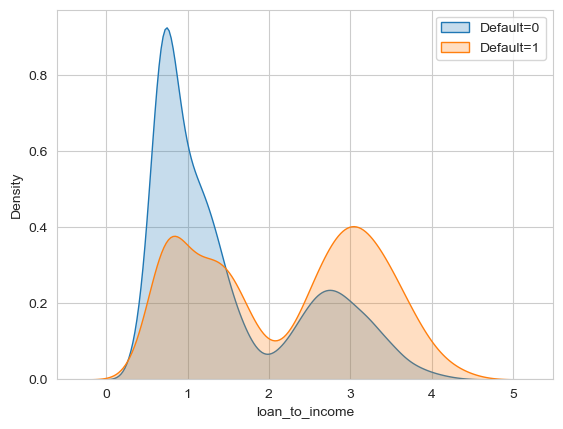

In [52]:
sns.kdeplot(df_train_1[df_train_1.default == 0]['loan_to_income'], fill=True, label='Default=0')
sns.kdeplot(df_train_1[df_train_1.default == 1]['loan_to_income'], fill=True, label='Default=1')
plt.legend()
plt.show()

In [53]:
df_train_1['delinquency_ratio'] = (df_train_1['delinquent_months']*100/df_train_1['total_loan_months']).round(2)
df_train_1[['delinquent_months', 'total_loan_months', 'delinquency_ratio']].head(3)

,delinquent_months,total_loan_months,delinquency_ratio
12746,20,152,13.16
32495,10,160,6.25
43675,12,54,22.22


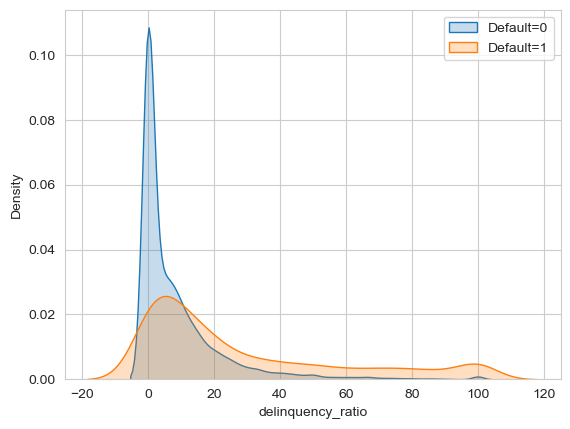

In [54]:
sns.kdeplot(df_train_1[df_train_1.default == 0]['delinquency_ratio'], fill=True, label='Default=0')
sns.kdeplot(df_train_1[df_train_1.default == 1]['delinquency_ratio'], fill=True, label='Default=1')
plt.legend()
plt.show()

In [55]:
df_train_1['avg_dpd_per_delinquency'] = np.where(
    df_train_1['delinquent_months'] != 0,
    (df_train_1['total_dpd']/df_train_1['delinquent_months']).round(2),
    0
)
df_train_1['avg_dpd_per_delinquency'].isna().sum()

np.int64(0)

In [56]:
df_train_1[df_train_1['avg_dpd_per_delinquency'].isna()].shape

(0, 36)

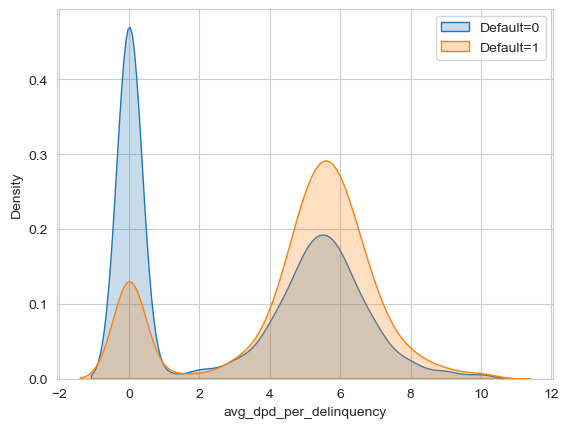

In [57]:
sns.kdeplot(df_train_1[df_train_1.default == 0]['avg_dpd_per_delinquency'], fill=True, label='Default=0')
sns.kdeplot(df_train_1[df_train_1.default == 1]['avg_dpd_per_delinquency'], fill=True, label='Default=1')
plt.legend()
plt.show()

In [58]:
df_test['loan_to_income'] = round(df_test['loan_amount']/df_test['income'], 2)
df_test['delinquency_ratio'] = (df_test['delinquent_months']*100/df_test['total_loan_months']).round(2)

df_test['avg_dpd_per_delinquency'] = np.where(
    df_test['delinquent_months'] != 0,
    (df_test['total_dpd']/df_test['delinquent_months']).round(2),
    0
)
df_test['avg_dpd_per_delinquency'].isna().sum()

np.int64(0)

### Feature Selection

In [59]:
df_train_2 = df_train_1.drop(["cust_id", "loan_id"], axis='columns')
df_test = df_test.drop(["cust_id", "loan_id"], axis='columns')

In [60]:
df_train_3 = df_train_2.drop(['disbursal_date', 'installment_start_dt', 'loan_amount', 'income',
                              'total_loan_months', 'delinquent_months', 'total_dpd'], axis="columns")
df_test = df_test.drop(['disbursal_date', 'installment_start_dt', 'loan_amount', 'income',
                        'total_loan_months', 'delinquent_months', 'total_dpd'], axis="columns")

In [61]:
df_train_3.columns

Index(['age', 'gender', 'marital_status', 'employment_status',
       'number_of_dependants', 'residence_type', 'years_at_current_address',
       'city', 'state', 'zipcode', 'loan_purpose', 'loan_type',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'default', 'loan_to_income',
       'delinquency_ratio', 'avg_dpd_per_delinquency'],
      dtype='object')

In [62]:
cols_to_scale = [col for col in df_train_3.select_dtypes(['int64', 'float64']) if col not in ['zipcode', 'default']]
cols_to_scale

['age',
 'number_of_dependants',
 'years_at_current_address',
 'sanction_amount',
 'processing_fee',
 'gst',
 'net_disbursement',
 'loan_tenure_months',
 'principal_outstanding',
 'bank_balance_at_application',
 'number_of_open_accounts',
 'number_of_closed_accounts',
 'enquiry_count',
 'credit_utilization_ratio',
 'loan_to_income',
 'delinquency_ratio',
 'avg_dpd_per_delinquency']

In [63]:
X_train = df_train_3.drop('default', axis='columns')
y_train = df_train_3['default']

from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = MinMaxScaler()
X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_train.describe()

,age,number_of_dependants,years_at_current_address,zipcode,sanction_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency
count,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00
mean,0.41,0.39,0.50,418876.24,0.09,0.08,0.08,0.08,0.38,0.26,0.12,0.50,0.50,0.50,0.44,0.29,0.10,0.33
std,0.19,0.31,0.30,169029.87,0.12,0.11,0.11,0.11,0.23,0.24,0.13,0.37,0.41,0.25,0.30,0.23,0.17,0.29
min,0.00,0.00,0.00,110001.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.29,0.00,0.23,302001.00,0.02,0.02,0.02,0.02,0.19,0.08,0.03,0.00,0.00,0.38,0.18,0.11,0.00,0.00
50%,0.40,0.40,0.50,400001.00,0.05,0.05,0.05,0.05,0.34,0.19,0.08,0.67,0.50,0.50,0.39,0.20,0.04,0.43
75%,0.54,0.60,0.77,560001.00,0.10,0.10,0.10,0.10,0.55,0.35,0.16,1.00,1.00,0.62,0.68,0.51,0.13,0.57
max,1.00,1.00,1.00,700001.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [64]:
X_test = df_test.drop('default', axis='columns')
y_test = df_test['default']

X_test[cols_to_scale] = scaler.fit_transform(X_test[cols_to_scale])
X_test.describe()

,age,number_of_dependants,years_at_current_address,zipcode,sanction_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency
count,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00
mean,0.42,0.38,0.50,419759.82,0.09,0.09,0.09,0.09,0.38,0.26,0.13,0.50,0.50,0.50,0.44,0.29,0.11,0.33
std,0.19,0.31,0.30,168845.35,0.12,0.12,0.12,0.12,0.23,0.25,0.14,0.37,0.41,0.25,0.30,0.23,0.17,0.29
min,0.00,0.00,0.00,110001.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.29,0.00,0.23,302001.00,0.02,0.02,0.02,0.02,0.19,0.08,0.04,0.00,0.00,0.38,0.18,0.11,0.00,0.00
50%,0.42,0.40,0.50,411001.00,0.05,0.05,0.05,0.05,0.34,0.20,0.09,0.33,0.50,0.50,0.39,0.20,0.04,0.44
75%,0.54,0.60,0.77,560001.00,0.10,0.10,0.10,0.10,0.55,0.36,0.17,0.67,1.00,0.62,0.68,0.50,0.13,0.58
max,1.00,1.00,1.00,700001.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [65]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
    vif_df = pd.DataFrame()
    vif_df['Column'] = data.columns
    vif_df['VIF'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    return vif_df

In [66]:
calculate_vif(X_train[cols_to_scale])

C:\Users\akber\miniconda3\envs\ml_env\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Column,VIF
0,age,5.55
1,number_of_dependants,2.72
2,years_at_current_address,3.36
3,sanction_amount,101.08
4,processing_fee,inf
5,gst,inf
6,net_disbursement,inf
7,loan_tenure_months,6.17
8,principal_outstanding,16.32
9,bank_balance_at_application,9.33


In [67]:
features_to_drop_vif = ['sanction_amount', 'processing_fee', 'gst', 'net_disbursement', 'principal_outstanding']
X_train_1 = X_train.drop(X_train[features_to_drop_vif], axis=1)

In [68]:
numeric_columns = X_train_1.select_dtypes(['int64', 'float64']).columns
numeric_columns

Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'loan_tenure_months', 'bank_balance_at_application',
       'number_of_open_accounts', 'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_delinquency'],
      dtype='object')

In [69]:
vif_df = calculate_vif(X_train_1[numeric_columns])
vif_df

,Column,VIF
0,age,5.53
1,number_of_dependants,2.73
2,years_at_current_address,3.45
3,zipcode,5.61
4,loan_tenure_months,6.03
5,bank_balance_at_application,1.81
6,number_of_open_accounts,4.36
7,number_of_closed_accounts,2.39
8,enquiry_count,6.44
9,credit_utilization_ratio,2.95


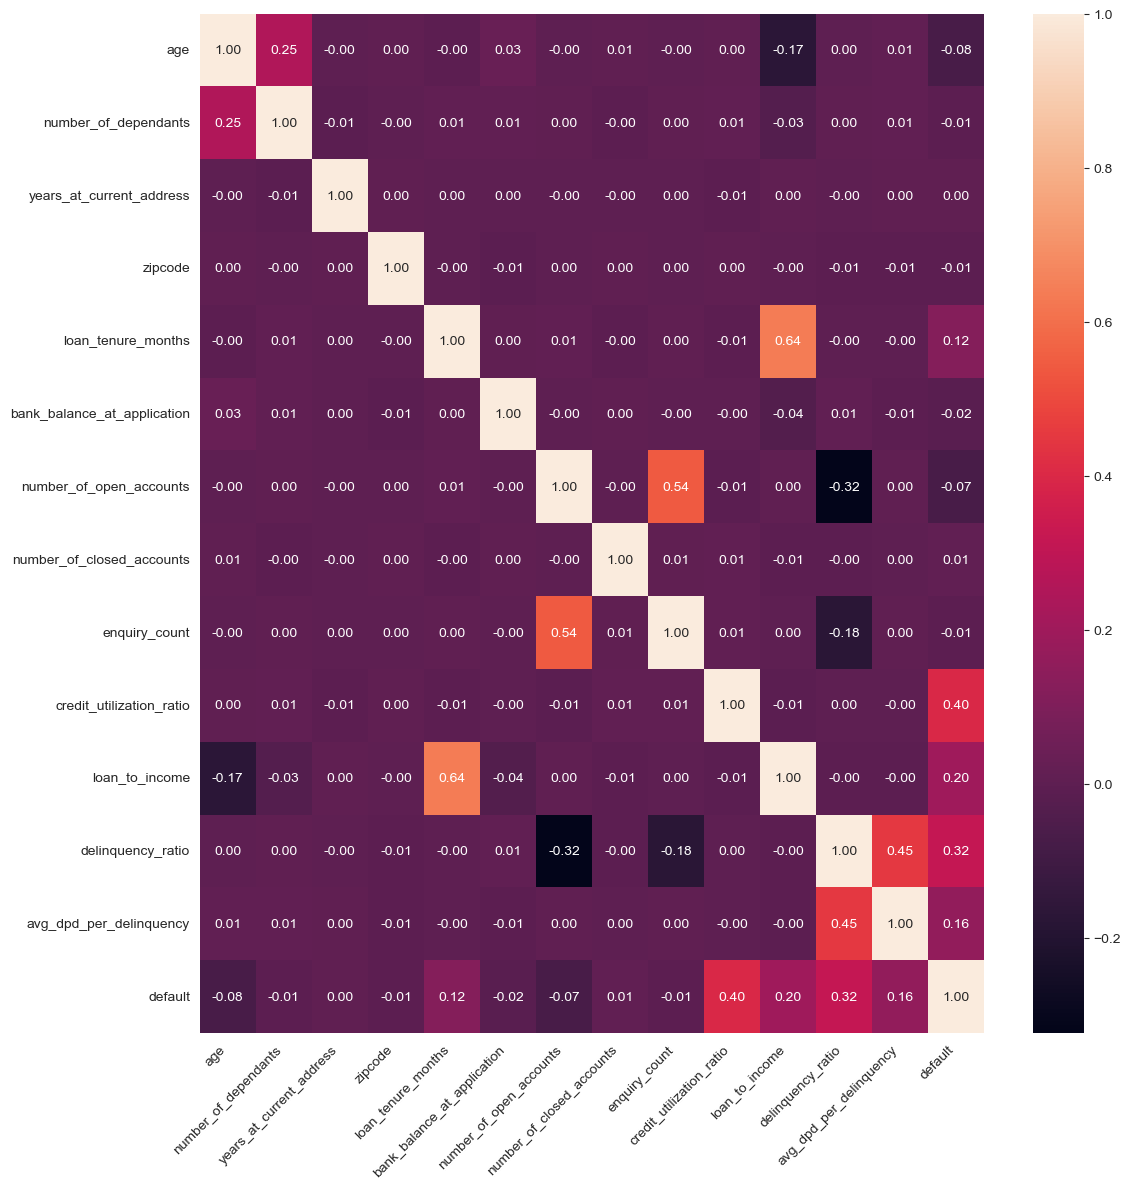

In [70]:
plt.figure(figsize=(12,12))
cm = df_train_3[numeric_columns.append(pd.Index(['default']))].corr()
sns.heatmap(cm, annot=True, fmt='0.2f')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### Calculate WOE and IV

In [71]:
def calculate_woe_iv(df, feature, target):
    grouped = df.groupby(feature)[target].agg(['count','sum'])
    grouped = grouped.rename(columns={'count': 'total', 'sum': 'good'})
    grouped['bad']=grouped['total']-grouped['good']
    
    total_good = grouped['good'].sum()
    total_bad = grouped['bad'].sum()
    
    grouped['good_pct'] = grouped['good'] / total_good
    grouped['bad_pct'] = grouped['bad'] / total_bad
    grouped['woe'] = np.log(grouped['good_pct']/ grouped['bad_pct'])
    grouped['iv'] = (grouped['good_pct'] -grouped['bad_pct'])*grouped['woe']
    
    grouped['woe'] = grouped['woe'].replace([np.inf, -np.inf], 0)
    grouped['iv'] = grouped['iv'].replace([np.inf, -np.inf], 0)
    
    total_iv = grouped['iv'].sum()
    
    return grouped, total_iv

grouped, total_iv = calculate_woe_iv(pd.concat([X_train_1, y_train],axis=1), 'loan_purpose', 'default')
grouped

,total,good,bad,good_pct,bad_pct,woe,iv
loan_purpose,,,,,,,
Auto,7447,327,7120,0.10,0.21,-0.72,0.08
Education,5620,559,5061,0.17,0.15,0.16,0.00
Home,11304,1734,9570,0.54,0.28,0.66,0.17
Personal,13117,603,12514,0.19,0.37,-0.67,0.12


In [72]:
iv_values = {}

for feature in X_train_1.columns:
    if X_train_1[feature].dtype == 'object':
        _, iv = calculate_woe_iv(pd.concat([X_train_1, y_train],axis=1), feature, 'default' )
    else:
        X_binned = pd.cut(X_train_1[feature], bins=10, labels=False)
        _, iv = calculate_woe_iv(pd.concat([X_binned, y_train],axis=1), feature, 'default' )
    iv_values[feature] = iv
        
iv_values

{'age': np.float64(0.0890689462679479),
 'gender': np.float64(0.00047449502170914947),
 'marital_status': np.float64(0.001129766845390142),
 'employment_status': np.float64(0.003953046301722585),
 'number_of_dependants': np.float64(0.0019380899135053508),
 'residence_type': np.float64(0.246745268718145),
 'years_at_current_address': np.float64(0.0020800513608156363),
 'city': np.float64(0.0019059578709781529),
 'state': np.float64(0.0019005589806779287),
 'zipcode': np.float64(0.0016677413243392572),
 'loan_purpose': np.float64(0.3691197842282755),
 'loan_type': np.float64(0.16319324904149224),
 'loan_tenure_months': np.float64(0.21893515090196278),
 'bank_balance_at_application': np.float64(0.0063187993277516365),
 'number_of_open_accounts': np.float64(0.08463134083005877),
 'number_of_closed_accounts': np.float64(0.0011964272592421567),
 'enquiry_count': np.float64(0.007864214085342608),
 'credit_utilization_ratio': np.float64(2.352965568168245),
 'loan_to_income': np.float64(0.47641

In [73]:
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))

iv_df = pd.DataFrame(list(iv_values.items()), columns=['Feature', 'IV'])
iv_df = iv_df.sort_values(by='IV', ascending=False)
iv_df

,Feature,IV
17,credit_utilization_ratio,2.353
19,delinquency_ratio,0.717
18,loan_to_income,0.476
20,avg_dpd_per_delinquency,0.402
10,loan_purpose,0.369
5,residence_type,0.247
12,loan_tenure_months,0.219
11,loan_type,0.163
0,age,0.089
14,number_of_open_accounts,0.085


In [74]:
# select features that has IV > 0.02
selected_features_iv = [feature for feature, iv in iv_values.items() if iv > 0.02]
selected_features_iv

['age',
 'residence_type',
 'loan_purpose',
 'loan_type',
 'loan_tenure_months',
 'number_of_open_accounts',
 'credit_utilization_ratio',
 'loan_to_income',
 'delinquency_ratio',
 'avg_dpd_per_delinquency']

In [75]:
X_train_reduced = X_train_1[selected_features_iv]
X_test_reduced = X_test[selected_features_iv]

In [76]:
X_train_encoded = pd.get_dummies(X_train_reduced, drop_first=True)
X_train_encoded.head(3)

,age,loan_tenure_months,number_of_open_accounts,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency,residence_type_Owned,residence_type_Rented,loan_purpose_Education,loan_purpose_Home,loan_purpose_Personal,loan_type_Unsecured
12746,0.788,0.415,1.000,0.364,0.415,0.132,0.590,True,False,False,True,False,False
32495,0.500,0.830,0.667,0.051,0.307,0.062,0.620,True,False,True,False,False,False
43675,0.385,0.491,0.000,0.000,0.759,0.222,0.558,False,False,False,True,False,False


In [77]:
X_test_encoded = pd.get_dummies(X_test_reduced, drop_first=True)
X_test_encoded.head(3)

,age,loan_tenure_months,number_of_open_accounts,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency,residence_type_Owned,residence_type_Rented,loan_purpose_Education,loan_purpose_Home,loan_purpose_Personal,loan_type_Unsecured
19205,0.346,0.755,0.333,0.990,0.548,0.000,0.000,True,False,False,True,False,False
15514,0.481,0.226,1.000,0.323,0.219,0.000,0.000,True,False,True,False,False,False
30367,0.231,0.547,0.667,0.828,0.179,0.000,0.000,True,False,False,False,False,False


# Modelling

In [78]:
from imblearn.combine import SMOTETomek

# Apply SMOTE+Tomek directly
smt = SMOTETomek(random_state=42)
X_train_balanced, y_train_balanced = smt.fit_resample(X_train_encoded, y_train)

# Check the new balance
print(y_train_balanced.value_counts())

# # Now train your model
# model.fit(X_train_balanced, y_train_balanced)

default
0    34199
1    34199
Name: count, dtype: int64


In [79]:
# from imblearn.combine import SMOTETomek

# smt = SMOTETomek(random_state=42)
# X_train_balanced, y_train_balanced = smt.fit_resample(X_train, y_train)

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [81]:
model_lr = LogisticRegression()
model_lr.fit(X_train_balanced, y_train_balanced)

y_pred = model_lr.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11423
           1       0.56      0.94      0.70      1074

    accuracy                           0.93     12497
   macro avg       0.78      0.94      0.83     12497
weighted avg       0.96      0.93      0.94     12497



In [82]:
from sklearn.ensemble import RandomForestClassifier

model_rm = RandomForestClassifier()
model_rm.fit(X_train_balanced, y_train_balanced)

y_pred = model_rm.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.96      0.98     11423
           1       0.70      0.86      0.77      1074

    accuracy                           0.96     12497
   macro avg       0.84      0.91      0.87     12497
weighted avg       0.96      0.96      0.96     12497



In [83]:
df.default.value_counts()

default
0    45703
1     4297
Name: count, dtype: int64

In [84]:
from xgboost import XGBClassifier
model_xgb = XGBClassifier()
model_xgb.fit(X_train_balanced, y_train_balanced)

y_pred = model_xgb.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.97      0.98     11423
           1       0.74      0.83      0.78      1074

    accuracy                           0.96     12497
   macro avg       0.86      0.90      0.88     12497
weighted avg       0.96      0.96      0.96     12497



In [85]:
# Lightgm
from lightgbm import LGBMClassifier

model_lgbm = LGBMClassifier()
model_lgbm.fit(X_train_balanced, y_train_balanced)

y_pred = model_lgbm.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

[LightGBM] [Info] Number of positive: 34199, number of negative: 34199
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002748 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1794
[LightGBM] [Info] Number of data points in the train set: 68398, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
              precision    recall  f1-score   support

           0       0.99      0.96      0.98     11423
           1       0.70      0.88      0.78      1074

    accuracy                           0.96     12497
   macro avg       0.84      0.92      0.88     12497
weighted avg       0.96      0.96      0.96     12497



### Let's Fine Tune our models with Optuna

In [86]:
# pip install optuna

In [87]:
import optuna
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score  # ← Add this import!

# Define the objective function for Optuna
def objective(trial):
    param = {
        'C': trial.suggest_float('C', 1e-4, 1e4, log=True),  # Logarithmically spaced values
        'solver': trial.suggest_categorical('solver', ['lbfgs', 'liblinear', 'saga', 'newton-cg']),  # Solvers
        'tol': trial.suggest_float('tol', 1e-6, 1e-1, log=True),  # Logarithmically spaced values for tolerance
        'class_weight': trial.suggest_categorical('class_weight', [None, 'balanced'])  # Class weights
    }

    model = LogisticRegression(**param, max_iter=10000)
    
    # Calculate the cross-validated f1_score
    f1_scorer = make_scorer(f1_score, average='macro')
    scores = cross_val_score(model, X_train_balanced, y_train_balanced, cv=3, scoring=f1_scorer, n_jobs=-1)
    
    return np.mean(scores)

study_logistic = optuna.create_study(direction='maximize')
study_logistic.optimize(objective, n_trials=50)

[I 2025-10-24 18:09:55,220] A new study created in memory with name: no-name-38d92169-65bb-4c0b-9415-c5eff629f9ea
[I 2025-10-24 18:10:07,604] Trial 0 finished with value: 0.9455173075637964 and parameters: {'C': 90.03027234736068, 'solver': 'saga', 'tol': 0.0319163941179405, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.9455173075637964.
[I 2025-10-24 18:10:16,117] Trial 1 finished with value: 0.9365153746259498 and parameters: {'C': 0.031321483865433423, 'solver': 'newton-cg', 'tol': 6.63652833205088e-06, 'class_weight': None}. Best is trial 0 with value: 0.9455173075637964.
[I 2025-10-24 18:10:24,707] Trial 2 finished with value: 0.9456704591800428 and parameters: {'C': 19.06014025796313, 'solver': 'liblinear', 'tol': 2.9676661375829884e-05, 'class_weight': None}. Best is trial 2 with value: 0.9456704591800428.
[I 2025-10-24 18:10:33,309] Trial 3 finished with value: 0.9456856919837988 and parameters: {'C': 999.4877966145777, 'solver': 'newton-cg', 'tol': 0.0001478418395

In [88]:
print('Best trial:')
trial = study_logistic.best_trial
print('  F1-score: {}'.format(trial.value))
print('  Params: ')
for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))
    
best_model_logistic = LogisticRegression(**study_logistic.best_params)
best_model_logistic.fit(X_train_balanced, y_train_balanced)

# Evaluate on the test set
y_pred = best_model_logistic.predict(X_test_encoded)

report = classification_report(y_test, y_pred)
print(report)

Best trial:
  F1-score: 0.945875091779062
  Params: 
    C: 3728.2058311270926
    solver: saga
    tol: 0.019190841195926168
    class_weight: balanced
              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11423
           1       0.56      0.94      0.70      1074

    accuracy                           0.93     12497
   macro avg       0.78      0.94      0.83     12497
weighted avg       0.96      0.93      0.94     12497



### Attempt 4

1. XGBoost
1. Handle Class Imbalance Using SMOTE Tomek
1. Parameter tunning using optuna

In [89]:
# Define the objective function for Optuna
def objective(trial):
    param = {
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'verbosity': 0,
        'booster': 'gbtree',
        'lambda': trial.suggest_float('lambda', 1e-3, 10.0, log=True),
        'alpha': trial.suggest_float('alpha', 1e-3, 10.0, log=True),
        'subsample': trial.suggest_float('subsample', 0.4, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.4, 1.0),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'eta': trial.suggest_float('eta', 0.01, 0.3),
        'gamma': trial.suggest_float('gamma', 0, 10),
        'scale_pos_weight': trial.suggest_float('scale_pos_weight', 1, 10),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'max_delta_step': trial.suggest_int('max_delta_step', 0, 10)
    }

    model = XGBClassifier(**param)
    
    # Calculate the cross-validated f1_score
    f1_scorer = make_scorer(f1_score, average='macro')
    scores = cross_val_score(model, X_train_balanced, y_train_balanced, cv=3, scoring=f1_scorer, n_jobs=-1)
    
    return np.mean(scores)

study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(objective, n_trials=50)

[I 2025-10-24 18:11:04,352] A new study created in memory with name: no-name-93b8eb24-414e-453b-a843-405edf0400e9
[I 2025-10-24 18:11:07,254] Trial 0 finished with value: 0.9492323601184877 and parameters: {'lambda': 0.0020697144973817485, 'alpha': 0.13519077141270994, 'subsample': 0.7880591632664433, 'colsample_bytree': 0.8868003105129184, 'max_depth': 3, 'eta': 0.25003815717909106, 'gamma': 2.7314770045808623, 'scale_pos_weight': 7.101505153836117, 'min_child_weight': 1, 'max_delta_step': 1}. Best is trial 0 with value: 0.9492323601184877.
[I 2025-10-24 18:11:09,889] Trial 1 finished with value: 0.9679577656526542 and parameters: {'lambda': 0.0032319165470092843, 'alpha': 0.001323608183342258, 'subsample': 0.9745649291597541, 'colsample_bytree': 0.7991869803913815, 'max_depth': 9, 'eta': 0.2950439815183821, 'gamma': 7.6732576246892235, 'scale_pos_weight': 3.4344346836139428, 'min_child_weight': 3, 'max_delta_step': 9}. Best is trial 1 with value: 0.9679577656526542.
[I 2025-10-24 18:

In [90]:
print('Best trial:')
trial = study_xgb.best_trial
print('  F1-score: {}'.format(trial.value))
print('  Params: ')
for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))
    
best_params = study_xgb.best_params
best_model_xgb = XGBClassifier(**best_params)
best_model_xgb.fit(X_train_balanced, y_train_balanced)

# Evaluate on the test set
y_pred = best_model_xgb.predict(X_test_encoded)

report = classification_report(y_test, y_pred)
print(report)

Best trial:
  F1-score: 0.9765444659223502
  Params: 
    lambda: 0.0026151054955028414
    alpha: 0.0018908866952074244
    subsample: 0.9467983412428017
    colsample_bytree: 0.626579445277054
    max_depth: 10
    eta: 0.26895470300606406
    gamma: 0.6452389915037786
    scale_pos_weight: 1.508986585596073
    min_child_weight: 1
    max_delta_step: 9
              precision    recall  f1-score   support

           0       0.98      0.97      0.98     11423
           1       0.72      0.83      0.77      1074

    accuracy                           0.96     12497
   macro avg       0.85      0.90      0.88     12497
weighted avg       0.96      0.96      0.96     12497



In [91]:
best_model_logistic

,penalty,'l2'
,dual,False
,tol,0.019190841195926168
,C,3728.2058311270926
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'saga'
,max_iter,100
,multi_class,'deprecated'


## Model Evaluation : ROC/AUC

In [92]:
y_pred = best_model_logistic.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11423
           1       0.56      0.94      0.70      1074

    accuracy                           0.93     12497
   macro avg       0.78      0.94      0.83     12497
weighted avg       0.96      0.93      0.94     12497



In [93]:
from sklearn.metrics import roc_curve

probabilities = best_model_logistic.predict_proba(X_test_encoded)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, probabilities)

fpr[:5], tpr[:5], thresholds[:5]

(array([0.        , 0.        , 0.        , 0.00008754, 0.00008754]),
 array([0.        , 0.0009311 , 0.15363128, 0.15363128, 0.17318436]),
 array([       inf, 1.        , 0.99957926, 0.99957895, 0.99944395]))

In [94]:
from sklearn.metrics import auc

area = auc(fpr, tpr)
area

0.9835499647791519

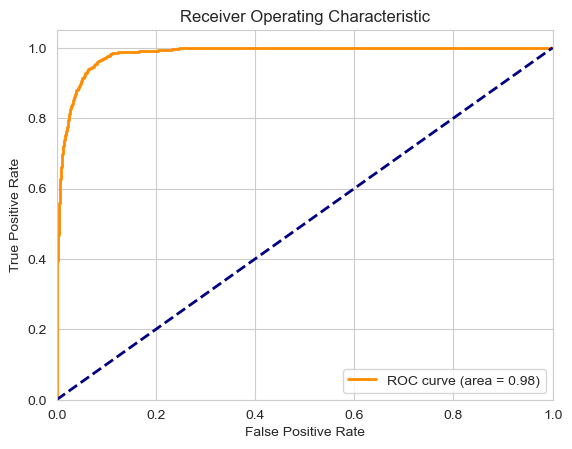

In [95]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % area)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## Model Evaluation : Rankordering, KS statistic, Gini coeff

In [96]:
probabilities = best_model_logistic.predict_proba(X_test_encoded)[:,1]

df_eval = pd.DataFrame({
    'Default Truth': y_test,
    'Default Probability': probabilities
})
df_eval.head(3)

,Default Truth,Default Probability
19205,0,0.496
15514,0,0.000
30367,0,0.005


In [97]:
df_eval['Decile'] = pd.qcut(df_eval['Default Probability'], 10, labels=False, duplicates='drop')
df_eval.head(3)

,Default Truth,Default Probability,Decile
19205,0,0.496,8
15514,0,0.000,2
30367,0,0.005,6


In [98]:
df_eval[df_eval.Decile==8]['Default Probability'].describe()

count   1250.000
mean       0.477
std        0.187
min        0.201
25%        0.307
50%        0.458
75%        0.639
max        0.820
Name: Default Probability, dtype: float64

In [99]:
df_decile = df_eval.groupby('Decile').apply(lambda x: pd.Series({
    'Minimum Probability': x['Default Probability'].min(),
    'Maximum Probability': x['Default Probability'].max(),
    'Events': x['Default Truth'].sum(),
    'Non-events': x['Default Truth'].count() - x['Default Truth'].sum(),    
}))
df_decile.reset_index(inplace=True)
df_decile

C:\Users\akber\AppData\Local\Temp\ipykernel_18164\4037021561.py:1: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_decile = df_eval.groupby('Decile').apply(lambda x: pd.Series({


,Decile,Minimum Probability,Maximum Probability,Events,Non-events
0,0,0.000,0.000,0.000,1250.000
1,1,0.000,0.000,0.000,1250.000
2,2,0.000,0.000,0.000,1249.000
3,3,0.000,0.000,0.000,1250.000
4,4,0.000,0.001,0.000,1250.000
5,5,0.001,0.004,0.000,1249.000
6,6,0.004,0.025,5.000,1245.000
7,7,0.025,0.201,9.000,1240.000
8,8,0.201,0.820,163.000,1087.000
9,9,0.820,1.000,897.000,353.000


In [100]:
df_decile['Event Rate'] = df_decile['Events']*100 / (df_decile['Events']+df_decile['Non-events'])
df_decile['Non-event Rate'] = df_decile['Non-events']*100 / (df_decile['Events']+df_decile['Non-events'])
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate
0,0,0.000,0.000,0.000,1250.000,0.000,100.000
1,1,0.000,0.000,0.000,1250.000,0.000,100.000
2,2,0.000,0.000,0.000,1249.000,0.000,100.000
3,3,0.000,0.000,0.000,1250.000,0.000,100.000
4,4,0.000,0.001,0.000,1250.000,0.000,100.000
5,5,0.001,0.004,0.000,1249.000,0.000,100.000
6,6,0.004,0.025,5.000,1245.000,0.400,99.600
7,7,0.025,0.201,9.000,1240.000,0.721,99.279
8,8,0.201,0.820,163.000,1087.000,13.040,86.960
9,9,0.820,1.000,897.000,353.000,71.760,28.240


In [101]:
df_decile = df_decile.sort_values(by='Decile', ascending=False).reset_index(drop=True)
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate
0,9,0.820,1.000,897.000,353.000,71.760,28.240
1,8,0.201,0.820,163.000,1087.000,13.040,86.960
2,7,0.025,0.201,9.000,1240.000,0.721,99.279
3,6,0.004,0.025,5.000,1245.000,0.400,99.600
4,5,0.001,0.004,0.000,1249.000,0.000,100.000
5,4,0.000,0.001,0.000,1250.000,0.000,100.000
6,3,0.000,0.000,0.000,1250.000,0.000,100.000
7,2,0.000,0.000,0.000,1249.000,0.000,100.000
8,1,0.000,0.000,0.000,1250.000,0.000,100.000
9,0,0.000,0.000,0.000,1250.000,0.000,100.000


In [102]:
df_decile['Cum Events'] =  df_decile['Events'].cumsum()
df_decile['Cum Non-events'] =  df_decile['Non-events'].cumsum()
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate,Cum Events,Cum Non-events
0,9,0.820,1.000,897.000,353.000,71.760,28.240,897.000,353.000
1,8,0.201,0.820,163.000,1087.000,13.040,86.960,1060.000,1440.000
2,7,0.025,0.201,9.000,1240.000,0.721,99.279,1069.000,2680.000
3,6,0.004,0.025,5.000,1245.000,0.400,99.600,1074.000,3925.000
4,5,0.001,0.004,0.000,1249.000,0.000,100.000,1074.000,5174.000
5,4,0.000,0.001,0.000,1250.000,0.000,100.000,1074.000,6424.000
6,3,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,7674.000
7,2,0.000,0.000,0.000,1249.000,0.000,100.000,1074.000,8923.000
8,1,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,10173.000
9,0,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,11423.000


In [103]:
df_decile['Cum Event Rate'] = df_decile['Cum Events'] * 100 / df_decile['Events'].sum()
df_decile['Cum Non-event Rate'] = df_decile['Cum Non-events']*100 / df_decile['Non-events'].sum()
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate,Cum Events,Cum Non-events,Cum Event Rate,Cum Non-event Rate
0,9,0.820,1.000,897.000,353.000,71.760,28.240,897.000,353.000,83.520,3.090
1,8,0.201,0.820,163.000,1087.000,13.040,86.960,1060.000,1440.000,98.696,12.606
2,7,0.025,0.201,9.000,1240.000,0.721,99.279,1069.000,2680.000,99.534,23.461
3,6,0.004,0.025,5.000,1245.000,0.400,99.600,1074.000,3925.000,100.000,34.361
4,5,0.001,0.004,0.000,1249.000,0.000,100.000,1074.000,5174.000,100.000,45.295
5,4,0.000,0.001,0.000,1250.000,0.000,100.000,1074.000,6424.000,100.000,56.237
6,3,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,7674.000,100.000,67.180
7,2,0.000,0.000,0.000,1249.000,0.000,100.000,1074.000,8923.000,100.000,78.114
8,1,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,10173.000,100.000,89.057
9,0,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,11423.000,100.000,100.000


In [104]:
df_decile['KS'] = abs(df_decile['Cum Event Rate'] - df_decile['Cum Non-event Rate'])
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate,Cum Events,Cum Non-events,Cum Event Rate,Cum Non-event Rate,KS
0,9,0.820,1.000,897.000,353.000,71.760,28.240,897.000,353.000,83.520,3.090,80.429
1,8,0.201,0.820,163.000,1087.000,13.040,86.960,1060.000,1440.000,98.696,12.606,86.090
2,7,0.025,0.201,9.000,1240.000,0.721,99.279,1069.000,2680.000,99.534,23.461,76.073
3,6,0.004,0.025,5.000,1245.000,0.400,99.600,1074.000,3925.000,100.000,34.361,65.639
4,5,0.001,0.004,0.000,1249.000,0.000,100.000,1074.000,5174.000,100.000,45.295,54.705
5,4,0.000,0.001,0.000,1250.000,0.000,100.000,1074.000,6424.000,100.000,56.237,43.763
6,3,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,7674.000,100.000,67.180,32.820
7,2,0.000,0.000,0.000,1249.000,0.000,100.000,1074.000,8923.000,100.000,78.114,21.886
8,1,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,10173.000,100.000,89.057,10.943
9,0,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,11423.000,100.000,100.000,0.000


To assess whether rank ordering is followed, we should look at whether higher deciles (those with higher predicted probabilities) have higher event rates compared to lower deciles. Rank ordering means that as you move from the top decile to the bottom decile, the event rate should generally decrease.

Non-Events - termed as good (customers) who do not default. Events - termed as bad (customers) who default.

Events and Non-Events terms are interchanged based on usecase to usecase.

eg: for marketing usecase, which customer to reach out (who will take loan based on offers) will be events - here it will termed as good, and the customers who will not take loans will be non-events (bad).

**Insights from the Decile Table**

1. Top Deciles

* The first decile (Decile 9) has a high event rate of 72.00% and a non-event rate of 28.00%. This indicates that the model is highly confident in predicting events in this decile.
* The second decile (Decile 8) also shows a significant event rate of 12.72%, with a cumulative event rate reaching 98.6%.

2. Middle Deciles:

* Deciles 7 and 6 show a significant drop in event rates

3. Lower Deciles:

* Deciles 5 to 0 show zero events, with all predictions being non-events. These deciles collectively have a non-event rate of 100%.

4. KS Statistic:

* The KS statistic, which is the maximum difference between cumulative event rates and cumulative non-event rates, is highest at Decile 8 with a value of 85.98%. This suggests that the model performs best at distinguishing between events and non-events up to this decile.

* The KS value gradually decreases in the following deciles, indicating a decrease in model performance for distinguishing between events and non-events.

**KS Value**

The highest KS value is 85.98%, found at Decile 8. This indicates that the model's performance in distinguishing between events and non-events is most significant at this decile. (If KS is in top 3 decile and score above 40, it is considered a good predictive model.)

In [105]:
gini_coefficient = 2 * area - 1

print("AUC:", area)
print("Gini Coefficient:", gini_coefficient)

AUC: 0.9835499647791519
Gini Coefficient: 0.9670999295583038


AUC of 0.98: The model is very good at distinguishing between events and non-events.

Gini coefficient of 0.96: This further confirms that the model is highly effective in its predictions, with almost perfect rank ordering capability.

The Gini coefficient ranges from -1 to 1, where a value closer to 1 signifies a perfect model, 0 indicates a model with no discriminative power, and -1 signifies a perfectly incorrect model.

#### Finalize The Model and Visualize Feature Importance

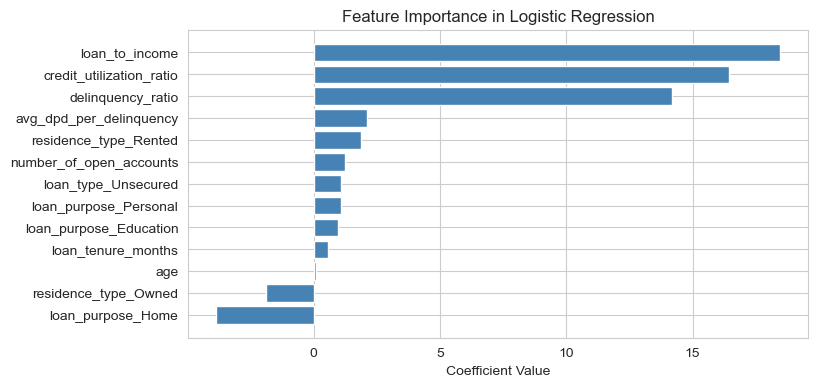

In [106]:
final_model = best_model_logistic

feature_importance = final_model.coef_[0]

# Create a DataFrame for easier handling
coef_df = pd.DataFrame(feature_importance, index=X_train_encoded.columns, columns=['Coefficients'])

# Sort the coefficients for better visualization
coef_df = coef_df.sort_values(by='Coefficients', ascending=True)

# Plotting
plt.figure(figsize=(8, 4))
plt.barh(coef_df.index, coef_df['Coefficients'], color='steelblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Logistic Regression')
plt.show()

### Save the Model

In [107]:
X_test_encoded.head(2)

,age,loan_tenure_months,number_of_open_accounts,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency,residence_type_Owned,residence_type_Rented,loan_purpose_Education,loan_purpose_Home,loan_purpose_Personal,loan_type_Unsecured
19205,0.346,0.755,0.333,0.990,0.548,0.000,0.000,True,False,False,True,False,False
15514,0.481,0.226,1.000,0.323,0.219,0.000,0.000,True,False,True,False,False,False


In [108]:
X_test_encoded.columns

Index(['age', 'loan_tenure_months', 'number_of_open_accounts',
       'credit_utilization_ratio', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_delinquency', 'residence_type_Owned',
       'residence_type_Rented', 'loan_purpose_Education', 'loan_purpose_Home',
       'loan_purpose_Personal', 'loan_type_Unsecured'],
      dtype='object')

In [109]:
cols_to_scale

['age',
 'number_of_dependants',
 'years_at_current_address',
 'sanction_amount',
 'processing_fee',
 'gst',
 'net_disbursement',
 'loan_tenure_months',
 'principal_outstanding',
 'bank_balance_at_application',
 'number_of_open_accounts',
 'number_of_closed_accounts',
 'enquiry_count',
 'credit_utilization_ratio',
 'loan_to_income',
 'delinquency_ratio',
 'avg_dpd_per_delinquency']

In [110]:
X_train_encoded.columns

Index(['age', 'loan_tenure_months', 'number_of_open_accounts',
       'credit_utilization_ratio', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_delinquency', 'residence_type_Owned',
       'residence_type_Rented', 'loan_purpose_Education', 'loan_purpose_Home',
       'loan_purpose_Personal', 'loan_type_Unsecured'],
      dtype='object')

In [111]:
from joblib import dump

model_data = {
    'model': final_model,
    'features': X_train_encoded.columns,
    'scaler': scaler,
    'cols_to_scale': cols_to_scale
}
dump(model_data, '../artifacts/model_data.joblib')

['../artifacts/model_data.joblib']

In [112]:
final_model.coef_, final_model.intercept_

(array([[ 0.10491659,  0.57230465,  1.2510329 , 16.4425907 , 18.45955065,
         14.17597044,  2.11327834, -1.89765117,  1.89210889,  0.98335144,
         -3.8446348 ,  1.09703226,  1.09703226]]),
 array([-21.54756248]))